In [101]:
# !pip install seaborn

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [22]:
def create_summary_dataframe(summary_df):
    rmse_columns = [col for col in summary_df.columns if col.startswith('rmse_')]
    summary_df['best_rmse'] = summary_df[rmse_columns].idxmin(axis=1)
    return summary_df

# Comparing with benchmark

In [10]:
# 0,19 seg
mean_0 = pd.read_csv('/Users/santiagoromano/Documents/code/MasterThesis/results/metrics_cluster_0_mean.csv')
mean_0 = mean_0[['pdv_codigo', 'codigo_barras_sku', 'mse_cant_vta_pred_mean_pdv_sku',
       'rmse_cant_vta_pred_mean_pdv_sku']]
print(mean_0['codigo_barras_sku'].nunique(), mean_0.shape, mean_0[['codigo_barras_sku','pdv_codigo']].drop_duplicates().shape)
# 0,34 seg
mean_1 = pd.read_csv('/Users/santiagoromano/Documents/code/MasterThesis/results/metrics_cluster_1_mean.csv')
mean_1 = mean_1[['pdv_codigo', 'codigo_barras_sku', 'mse_cant_vta_pred_mean_pdv_sku',
       'rmse_cant_vta_pred_mean_pdv_sku']]
print(mean_1['codigo_barras_sku'].nunique(), mean_1.shape, mean_1[['codigo_barras_sku','pdv_codigo']].drop_duplicates().shape)
# 0,23 seg
mean_2 = pd.read_csv('/Users/santiagoromano/Documents/code/MasterThesis/results/metrics_cluster_2_mean.csv')
mean_2 = mean_2[['pdv_codigo', 'codigo_barras_sku', 'mse_cant_vta_pred_mean_pdv_sku',
       'rmse_cant_vta_pred_mean_pdv_sku']]
print(mean_2['codigo_barras_sku'].nunique(), mean_2.shape, mean_2[['codigo_barras_sku','pdv_codigo']].drop_duplicates().shape)

10 (219, 4) (219, 2)
10 (156, 4) (156, 2)
10 (88, 4) (88, 2)


In [11]:
print(mean_0['rmse_cant_vta_pred_mean_pdv_sku'].median(),mean_0['rmse_cant_vta_pred_mean_pdv_sku'].mean())
print(mean_1['rmse_cant_vta_pred_mean_pdv_sku'].median(),mean_1['rmse_cant_vta_pred_mean_pdv_sku'].mean())
print(mean_2['rmse_cant_vta_pred_mean_pdv_sku'].median(),mean_2['rmse_cant_vta_pred_mean_pdv_sku'].mean())

6626.7 9245.24794520548
37088.25 124390.19679487181
19112.25 20278.31590909091


## SFF

In [8]:
# SFF
# 356 seg
sff_0 = pd.read_csv('/Users/santiagoromano/Documents/code/MasterThesis/results/metrics_cluster_0_sff.csv')
sff_0 = sff_0[['pdv_codigo', 'codigo_barras_sku',
       'rmse_cant_vta_pred_sff_mean']]
print(sff_0['codigo_barras_sku'].nunique(), sff_0.shape, sff_0[['codigo_barras_sku','pdv_codigo']].drop_duplicates().shape)

# 485 seg
sff_1 = pd.read_csv('/Users/santiagoromano/Documents/code/MasterThesis/results/metrics_cluster_1_sff.csv')
sff_1 = sff_1[['pdv_codigo', 'codigo_barras_sku',
       'rmse_cant_vta_pred_sff_mean']]
print(sff_1['codigo_barras_sku'].nunique(), sff_1.shape, sff_1[['codigo_barras_sku','pdv_codigo']].drop_duplicates().shape)

# 458 seg
sff_2 = pd.read_csv('/Users/santiagoromano/Documents/code/MasterThesis/results/metrics_cluster_2_sff.csv')
sff_2 = sff_2[['pdv_codigo', 'codigo_barras_sku',
       'rmse_cant_vta_pred_sff_mean']]
print(sff_2['codigo_barras_sku'].nunique(), sff_2.shape, sff_2[['codigo_barras_sku','pdv_codigo']].drop_duplicates().shape)

10 (219, 3) (219, 2)
10 (156, 3) (156, 2)
10 (88, 3) (88, 2)


In [9]:
print(sff_0['rmse_cant_vta_pred_sff_mean'].median(),sff_0['rmse_cant_vta_pred_sff_mean'].mean())
print(sff_1['rmse_cant_vta_pred_sff_mean'].median(),sff_1['rmse_cant_vta_pred_sff_mean'].mean())
print(sff_2['rmse_cant_vta_pred_sff_mean'].median(),sff_2['rmse_cant_vta_pred_sff_mean'].mean())

13359.3 17684.017808219178
31593.8 117151.14615384619
17534.550000000003 18420.2875


In [ ]:
6521.3 9314.290867579908

In [ ]:
# SFF
# 356 seg
sff_0 = pd.read_csv('/Users/santiagoromano/Documents/code/MasterThesis/results/metrics_cluster_0_sff.csv')
sff_0 = sff_0[['pdv_codigo', 'codigo_barras_sku',
       'rmse_cant_vta_pred_sff_mean']]
print(sff_0['codigo_barras_sku'].nunique(), sff_0.shape, sff_0[['codigo_barras_sku','pdv_codigo']].drop_duplicates().shape)

# 485 seg
sff_1 = pd.read_csv('/Users/santiagoromano/Documents/code/MasterThesis/results/metrics_cluster_1_sff.csv')
sff_1 = sff_1[['pdv_codigo', 'codigo_barras_sku',
       'rmse_cant_vta_pred_sff_mean']]
print(sff_1['codigo_barras_sku'].nunique(), sff_1.shape, sff_1[['codigo_barras_sku','pdv_codigo']].drop_duplicates().shape)

# 458 seg
sff_2 = pd.read_csv('/Users/santiagoromano/Documents/code/MasterThesis/results/metrics_cluster_2_sff.csv')
sff_2 = sff_2[['pdv_codigo', 'codigo_barras_sku',
       'rmse_cant_vta_pred_sff_mean']]
print(sff_2['codigo_barras_sku'].nunique(), sff_2.shape, sff_2[['codigo_barras_sku','pdv_codigo']].drop_duplicates().shape)

best_rmse
rmse_cant_vta_pred_mean_pdv_sku    113
rmse_cant_vta_pred_sff_mean        106
Name: count, dtype: int64
best_rmse
rmse_cant_vta_pred_sff_mean        107
rmse_cant_vta_pred_mean_pdv_sku     49
Name: count, dtype: int64
best_rmse
rmse_cant_vta_pred_sff_mean        70
rmse_cant_vta_pred_mean_pdv_sku    18
Name: count, dtype: int64


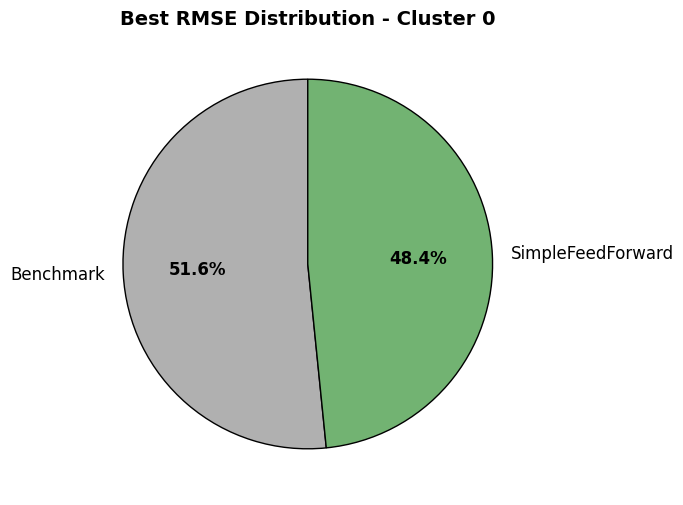

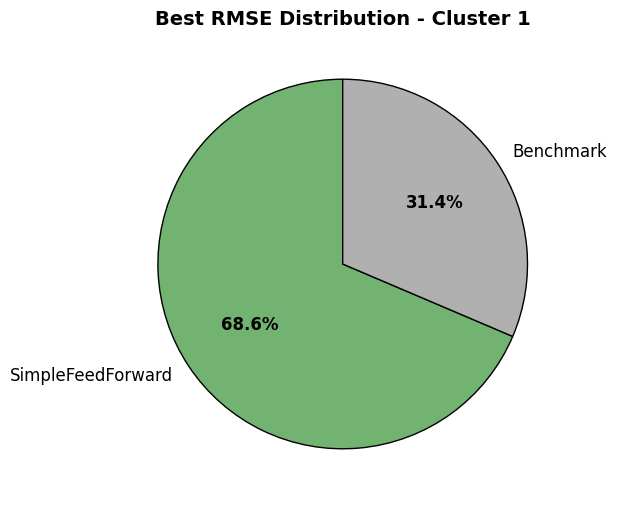

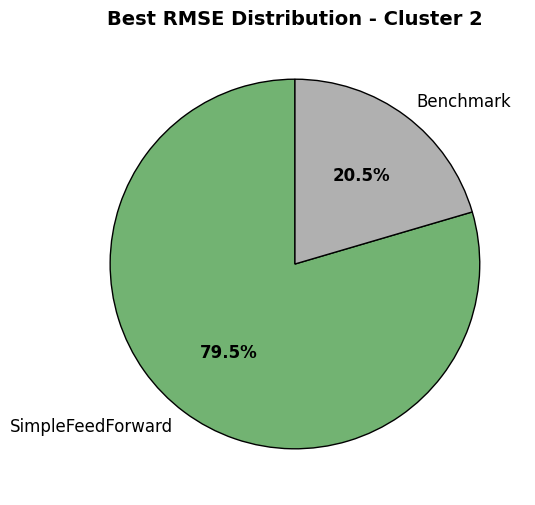

In [269]:
#a)
test_0 = sff_0.merge(mean_0, on=['pdv_codigo', 'codigo_barras_sku'], how='inner')
summary_0 = create_summary_dataframe(test_0)
print(summary_0['best_rmse'].value_counts())

test_1 = sff_1.merge(mean_1, on=['pdv_codigo', 'codigo_barras_sku'], how='inner')
summary_1 = create_summary_dataframe(test_1)
print(summary_1['best_rmse'].value_counts())

test_2 = sff_2.merge(mean_2, on=['pdv_codigo', 'codigo_barras_sku'], how='inner')
summary_2 = create_summary_dataframe(test_2)
print(summary_2['best_rmse'].value_counts())

# Define professional-looking colors
color_mapping = {
    "rmse_cant_vta_pred_mean_pdv_sku": "#B0B0B0",  # Light Grey for Benchmark
    "rmse_cant_vta_pred_sff_mean": "#72B372"      # Soft Green for SimpleFeedForward
}
label_mapping = {
    "rmse_cant_vta_pred_mean_pdv_sku": "Benchmark",
    "rmse_cant_vta_pred_sff_mean": "SimpleFeedForward"
}

# List of summaries and titles
summaries = [summary_0, summary_1, summary_2]
titles = ["Cluster 0", "Cluster 1", "Cluster 2"]

# Generate separate pie charts with the same size
for summary, title in zip(summaries, titles):
    fig, ax = plt.subplots(figsize=(6, 6))  # Ensure same size for all figures
    
    # Count values for 'best_rmse' and rename labels
    value_counts = summary['best_rmse'].value_counts()
    labels = [label_mapping[label] for label in value_counts.index]  # Map to new labels
    colors = [color_mapping[label] for label in value_counts.index]  # Map to colors
    
    # Create the pie chart
    wedges, texts, autotexts = ax.pie(
        value_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1},  # Adds border for clarity
        textprops={'fontsize': 12, 'color': 'black'}  # Improve text readability
    )
    
    # Make percentage labels bold
    for autotext in autotexts:
        autotext.set_fontweight("bold")
    
    # Add title with better formatting
    ax.set_title(f"Best RMSE Distribution - {title}", fontsize=14, fontweight="bold")
    
    # Show the plot
    plt.show()

In [270]:
#   b)
test_0['mejora_%'] =  round(((test_0['rmse_cant_vta_pred_mean_pdv_sku'] - test_0['rmse_cant_vta_pred_sff_mean']) / test_0['rmse_cant_vta_pred_mean_pdv_sku'])*100,3)
# print(test_0['mejora_%'].describe())

test_1['mejora_%'] =  round(((test_1['rmse_cant_vta_pred_mean_pdv_sku'] - test_1['rmse_cant_vta_pred_sff_mean']) / test_1['rmse_cant_vta_pred_mean_pdv_sku'])*100,3)
# print(test_1['mejora_%'].describe())

test_2['mejora_%'] =  round(((test_2['rmse_cant_vta_pred_mean_pdv_sku'] - test_2['rmse_cant_vta_pred_sff_mean']) / test_2['rmse_cant_vta_pred_mean_pdv_sku'])*100,3)
# print(test_2['mejora_%'].describe())


# 2. Estadísticos
print(f"cluster 0: sff gana en {(test_0['mejora_%'] > 0).mean():.1%} de casos")
print(f"Mediana de la mejora: {test_0[test_0['mejora_%'] > 0]['mejora_%'].median():.1f}%")

print(f"cluster 1: sff gana en {(test_1['mejora_%'] > 0).mean():.1%} de casos")
print(f"Mediana de la mejora: {test_1[test_1['mejora_%'] > 0]['mejora_%'].median():.1f}%")

print(f"cluster 2: sff gana en {(test_2['mejora_%'] > 0).mean():.1%} de casos")
print(f"Mediana de la mejora: {test_2[test_2['mejora_%'] > 0]['mejora_%'].median():.1f}%")


cluster 0: sff gana en 48.4% de casos
Mediana de la mejora: 7.7%
cluster 1: sff gana en 68.6% de casos
Mediana de la mejora: 16.8%
cluster 2: sff gana en 79.5% de casos
Mediana de la mejora: 13.4%


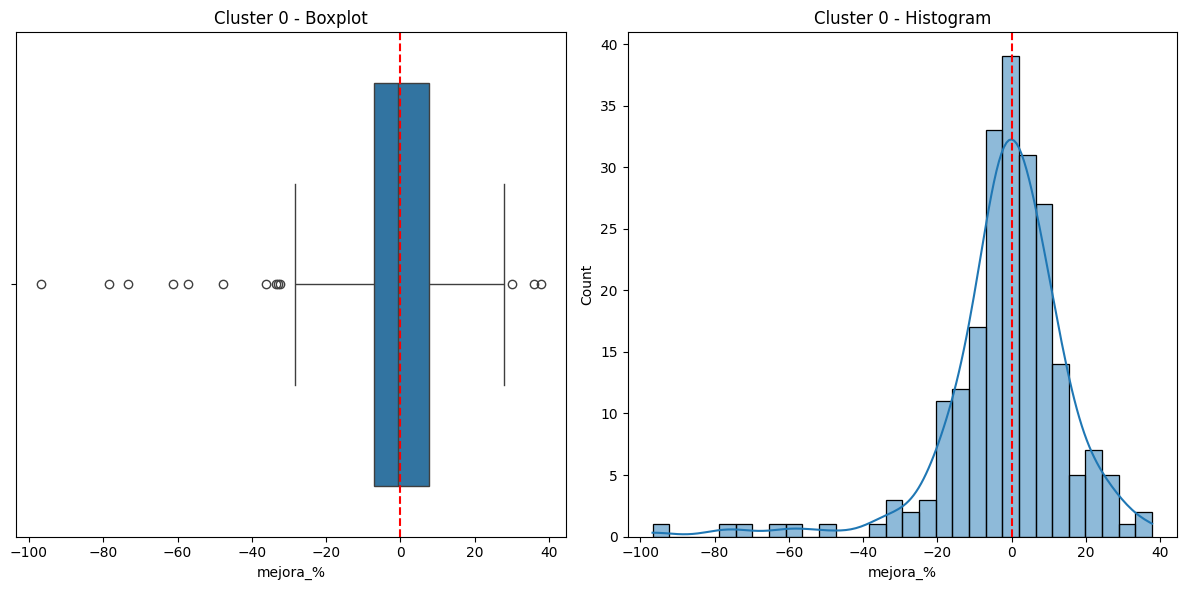

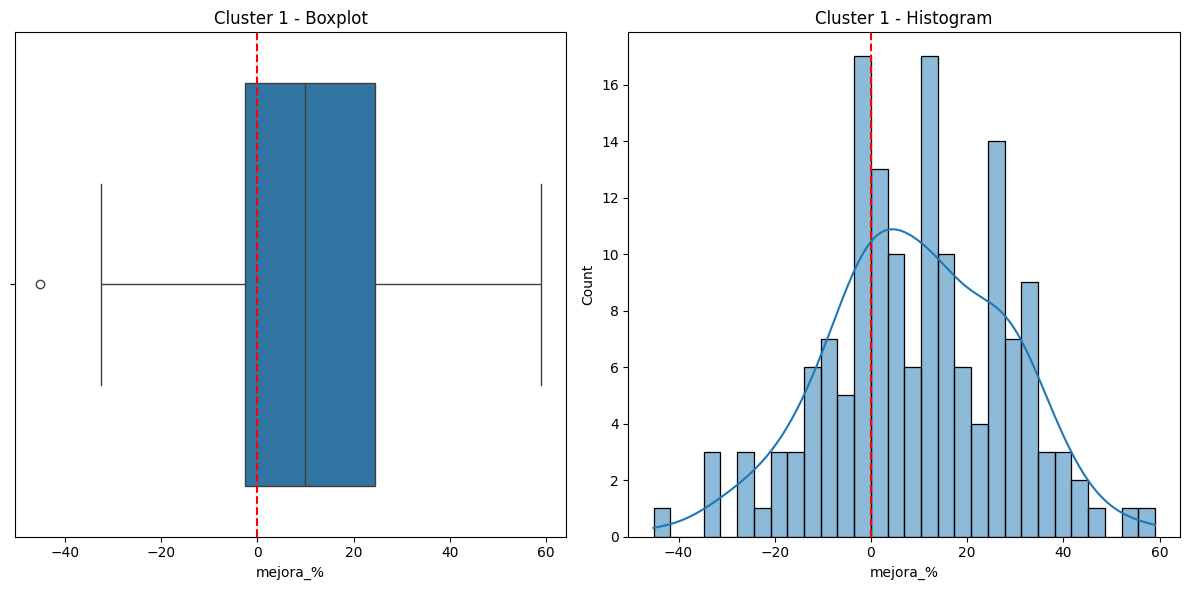

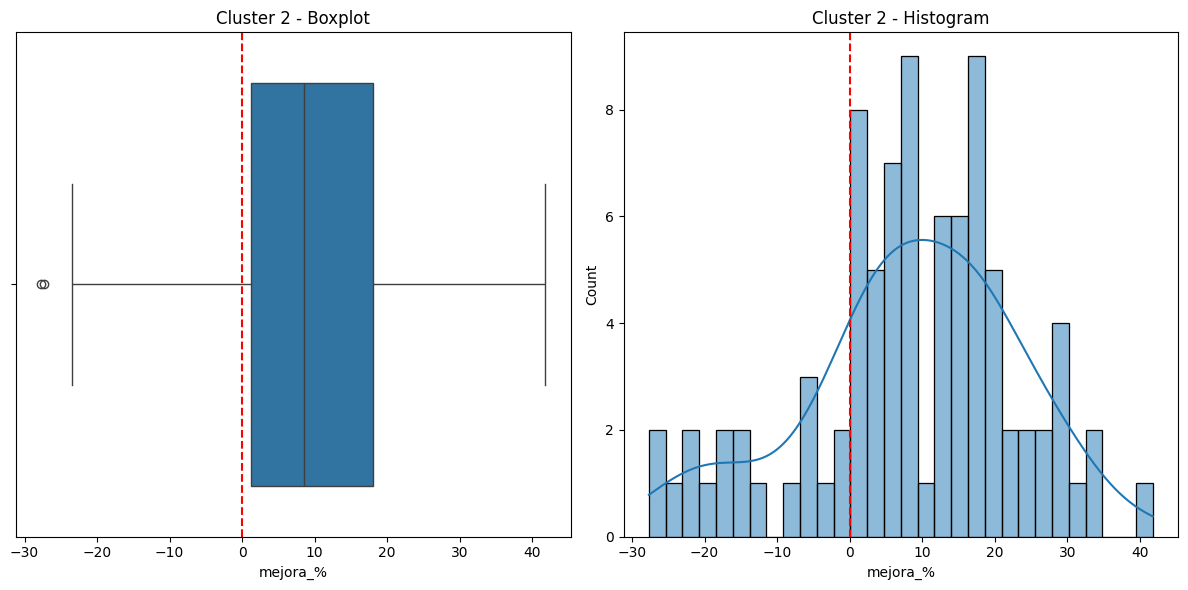

In [271]:

# List of datasets and titles
datasets = [test_0, test_1, test_2]
titles = ["Cluster 0", "Cluster 1", "Cluster 2"]

for data, title in zip(datasets, titles):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Create a separate figure for each cluster

    # Boxplot
    sns.boxplot(data=data, x='mejora_%', ax=axes[0])
    axes[0].axvline(0, color='red', linestyle='--')
    axes[0].set_title(f"{title} - Boxplot")

    # Histogram
    sns.histplot(data['mejora_%'], bins=30, kde=True, ax=axes[1])
    axes[1].axvline(0, color='red', linestyle='--')
    axes[1].set_title(f"{title} - Histogram")

    plt.tight_layout()
    plt.show()  # Show each figure separately

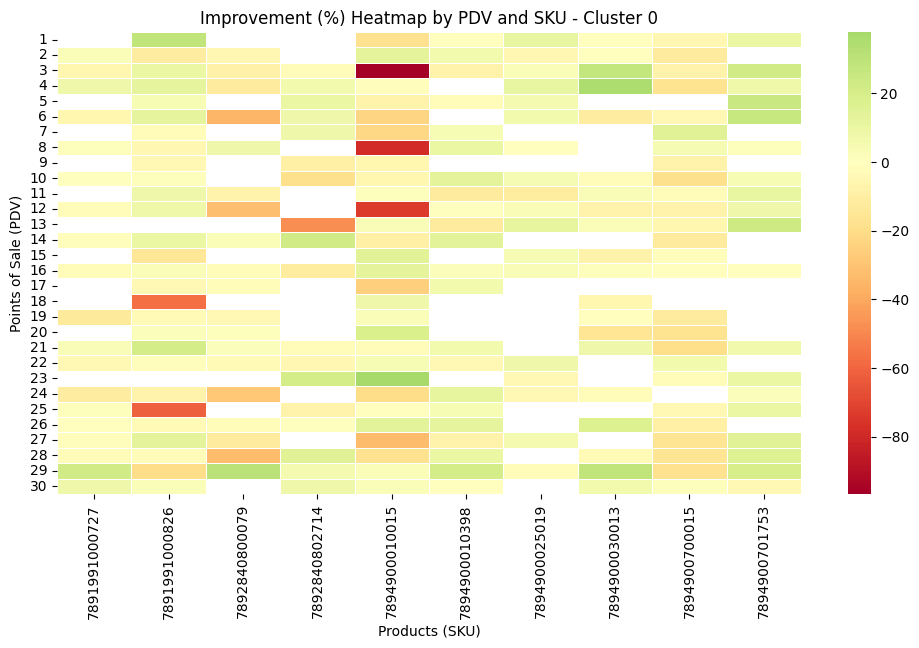

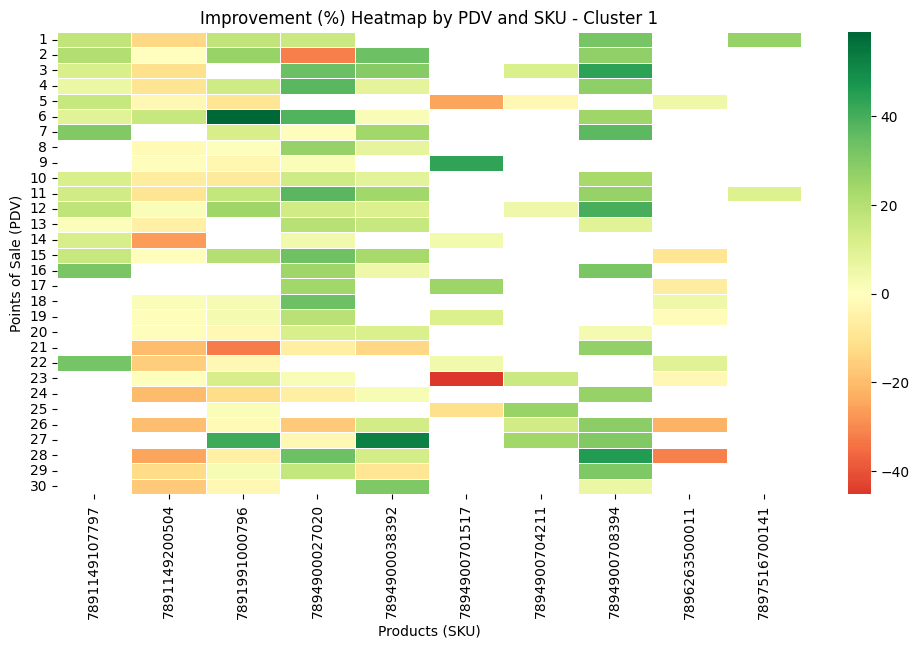

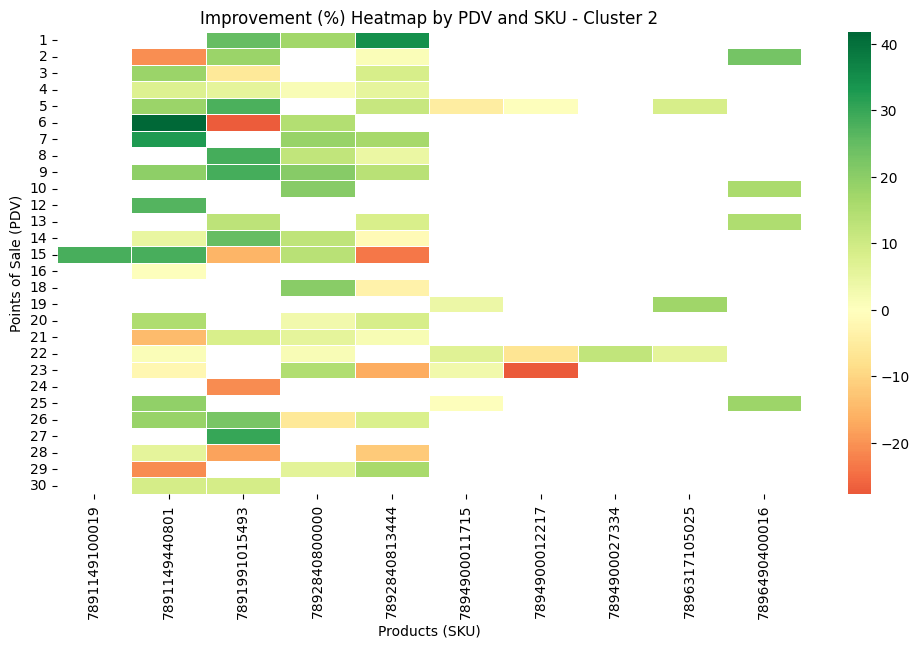

In [272]:
# List of datasets and titles
datasets = [test_0, test_1, test_2]
titles = ["Cluster 0", "Cluster 1", "Cluster 2"]

# Loop through datasets and create separate plots
for data, title in zip(datasets, titles):
    plt.figure(figsize=(12, 6))  # Create a new figure for each heatmap
    pivot_data = data.pivot_table(index='pdv_codigo', columns='codigo_barras_sku', values='mejora_%')

    sns.heatmap(pivot_data, cmap="RdYlGn", center=0, annot=False, linewidths=0.5)
    
    plt.title(f"Improvement (%) Heatmap by PDV and SKU - {title}")
    plt.xlabel("Products (SKU)")
    plt.ylabel("Points of Sale (PDV)")
    
    plt.show()  # Show each heatmap separately


# DeepAR

In [226]:
#  2029 seg
deepar_0 = pd.read_csv('/Users/santiagoromano/Documents/code/MasterThesis/results/metrics_cluster_0_deepar.csv')
print(deepar_0['codigo_barras_sku'].nunique(), deepar_0.shape, deepar_0[['codigo_barras_sku','pdv_codigo']].drop_duplicates().shape)

# 2089 seg
deepar_1 = pd.read_csv('/Users/santiagoromano/Documents/code/MasterThesis/results/metrics_cluster_1_deepar.csv')
print(deepar_1['codigo_barras_sku'].nunique(), deepar_1.shape, deepar_1[['codigo_barras_sku','pdv_codigo']].drop_duplicates().shape)

# 2051  seg
deepar_2 = pd.read_csv('/Users/santiagoromano/Documents/code/MasterThesis/results/metrics_cluster_2_deepar.csv')
print(deepar_2['codigo_barras_sku'].nunique(), deepar_2.shape, deepar_2[['codigo_barras_sku','pdv_codigo']].drop_duplicates().shape)

10 (63, 8) (63, 2)
10 (156, 8) (156, 2)
10 (88, 8) (88, 2)


In [227]:
deepar_mean_0 = deepar_0[['pdv_codigo', 'codigo_barras_sku', 'mse_cant_vta_pred_deepar_mean',
       'rmse_cant_vta_pred_deepar_mean']]
deepar_mean_1 = deepar_1[['pdv_codigo', 'codigo_barras_sku', 'mse_cant_vta_pred_deepar_mean',
         'rmse_cant_vta_pred_deepar_mean']]
deepar_mean_2 = deepar_2[['pdv_codigo', 'codigo_barras_sku', 'mse_cant_vta_pred_deepar_mean',
            'rmse_cant_vta_pred_deepar_mean']]

deepar_median_0 = deepar_0[['pdv_codigo', 'codigo_barras_sku', 'mse_cant_vta_pred_deepar_median',
         'rmse_cant_vta_pred_deepar_median']]
deepar_median_1 = deepar_1[['pdv_codigo', 'codigo_barras_sku', 'mse_cant_vta_pred_deepar_median',
              'rmse_cant_vta_pred_deepar_median']]
deepar_median_2 = deepar_2[['pdv_codigo', 'codigo_barras_sku', 'mse_cant_vta_pred_deepar_median',
                 'rmse_cant_vta_pred_deepar_median']]

In [228]:
print(deepar_median_0['rmse_cant_vta_pred_deepar_median'].median(),deepar_median_0['rmse_cant_vta_pred_deepar_median'].mean())
print(deepar_median_1['rmse_cant_vta_pred_deepar_median'].median(),deepar_median_1['rmse_cant_vta_pred_deepar_median'].mean())
print(deepar_median_2['rmse_cant_vta_pred_deepar_median'].median(),deepar_median_2['rmse_cant_vta_pred_deepar_median'].mean())

# print(deepar_mean_0['rmse_cant_vta_pred_deepar_mean'].median(),deepar_mean_0['rmse_cant_vta_pred_deepar_mean'].mean())
# print(deepar_mean_1['rmse_cant_vta_pred_deepar_mean'].median(),deepar_mean_1['rmse_cant_vta_pred_deepar_mean'].mean())
# print(deepar_mean_2['rmse_cant_vta_pred_deepar_mean'].median(),deepar_mean_2['rmse_cant_vta_pred_deepar_mean'].mean())


8216.2 8813.960317460318
37230.45 123712.5782051282
17672.300000000003 18889.27613636364


best_rmse
rmse_cant_vta_pred_mean_pdv_sku     34
rmse_cant_vta_pred_deepar_median    29
Name: count, dtype: int64
best_rmse
rmse_cant_vta_pred_mean_pdv_sku     81
rmse_cant_vta_pred_deepar_median    75
Name: count, dtype: int64
best_rmse
rmse_cant_vta_pred_deepar_median    53
rmse_cant_vta_pred_mean_pdv_sku     35
Name: count, dtype: int64


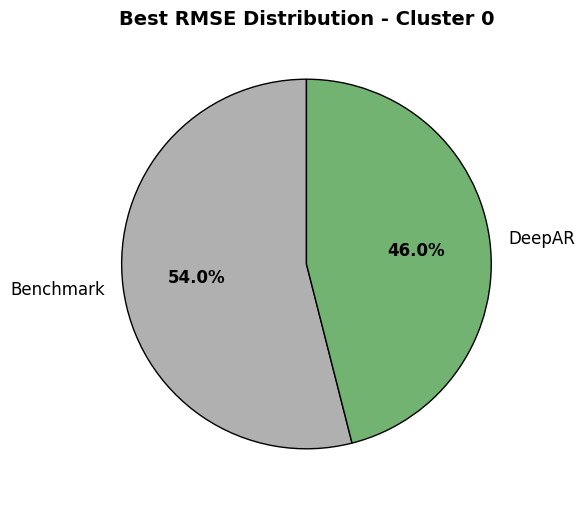

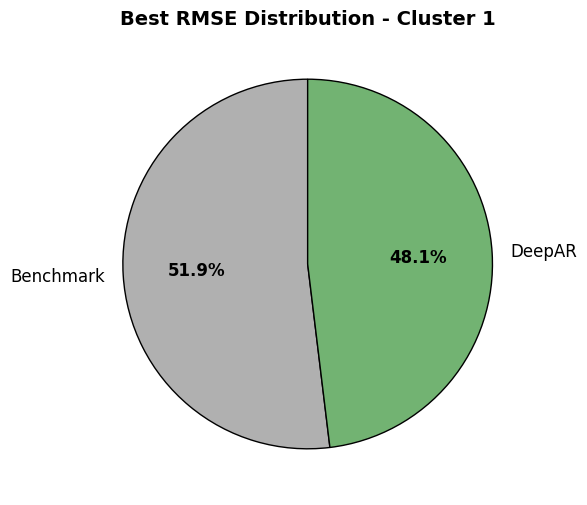

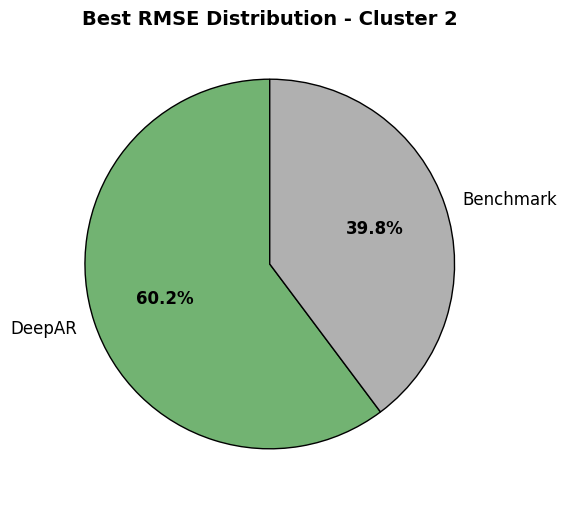

In [229]:
#a)
test_0 = deepar_median_0.merge(mean_0, on=['pdv_codigo', 'codigo_barras_sku'], how='inner')
summary_0 = create_summary_dataframe(test_0)
print(summary_0['best_rmse'].value_counts())

test_1 = deepar_median_1.merge(mean_1, on=['pdv_codigo', 'codigo_barras_sku'], how='inner')
summary_1 = create_summary_dataframe(test_1)
print(summary_1['best_rmse'].value_counts())

test_2 = deepar_median_2.merge(mean_2, on=['pdv_codigo', 'codigo_barras_sku'], how='inner')
summary_2 = create_summary_dataframe(test_2)
print(summary_2['best_rmse'].value_counts())

# Define professional-looking colors
color_mapping = {
    "rmse_cant_vta_pred_mean_pdv_sku": "#B0B0B0",  # Light Grey for Benchmark
    "rmse_cant_vta_pred_deepar_median": "#72B372"      # Soft Green for SimpleFeedForward
}
label_mapping = {
    "rmse_cant_vta_pred_mean_pdv_sku": "Benchmark",
    "rmse_cant_vta_pred_deepar_median": "DeepAR"
}

# List of summaries and titles
summaries = [summary_0, summary_1, summary_2]
titles = ["Cluster 0", "Cluster 1", "Cluster 2"]

# Generate separate pie charts with the same size
for summary, title in zip(summaries, titles):
    fig, ax = plt.subplots(figsize=(6, 6))  # Ensure same size for all figures
    
    # Count values for 'best_rmse' and rename labels
    value_counts = summary['best_rmse'].value_counts()
    labels = [label_mapping[label] for label in value_counts.index]  # Map to new labels
    colors = [color_mapping[label] for label in value_counts.index]  # Map to colors
    
    # Create the pie chart
    wedges, texts, autotexts = ax.pie(
        value_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1},  # Adds border for clarity
        textprops={'fontsize': 12, 'color': 'black'}  # Improve text readability
    )
    
    # Make percentage labels bold
    for autotext in autotexts:
        autotext.set_fontweight("bold")
    
    # Add title with better formatting
    ax.set_title(f"Best RMSE Distribution - {title}", fontsize=14, fontweight="bold")
    
    # Show the plot
    plt.show()

In [230]:
#   b)
test_0['mejora_%'] =  round(((test_0['rmse_cant_vta_pred_mean_pdv_sku'] - test_0['rmse_cant_vta_pred_deepar_median']) / test_0['rmse_cant_vta_pred_mean_pdv_sku'])*100,3)
# print(test_0['mejora_%'].describe())

test_1['mejora_%'] =  round(((test_1['rmse_cant_vta_pred_mean_pdv_sku'] - test_1['rmse_cant_vta_pred_deepar_median']) / test_1['rmse_cant_vta_pred_mean_pdv_sku'])*100,3)
# print(test_1['mejora_%'].describe())

test_2['mejora_%'] =  round(((test_2['rmse_cant_vta_pred_mean_pdv_sku'] - test_2['rmse_cant_vta_pred_deepar_median']) / test_2['rmse_cant_vta_pred_mean_pdv_sku'])*100,3)
# print(test_2['mejora_%'].describe())


# 2. Estadísticos
print(f"cluster 0: deepar gana en {(test_0['mejora_%'] > 0).mean():.1%} de casos")
print(f"Mediana de la mejora: {test_0[test_0['mejora_%'] > 0]['mejora_%'].median():.1f}%")

print(f"cluster 1: deepar gana en {(test_1['mejora_%'] > 0).mean():.1%} de casos")
print(f"Mediana de la mejora: {test_1[test_1['mejora_%'] > 0]['mejora_%'].median():.1f}%")

print(f"cluster 2: deepar gana en {(test_2['mejora_%'] > 0).mean():.1%} de casos")
print(f"Mediana de la mejora: {test_2[test_2['mejora_%'] > 0]['mejora_%'].median():.1f}%")

cluster 0: deepar gana en 46.0% de casos
Mediana de la mejora: 4.2%
cluster 1: deepar gana en 48.1% de casos
Mediana de la mejora: 10.7%
cluster 2: deepar gana en 60.2% de casos
Mediana de la mejora: 14.5%


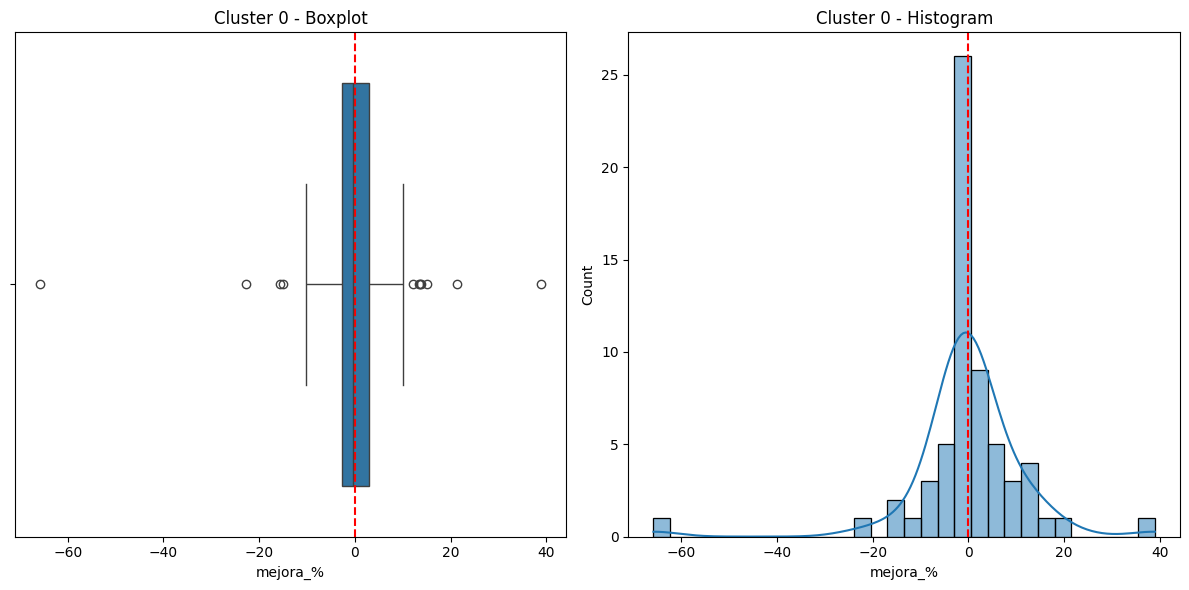

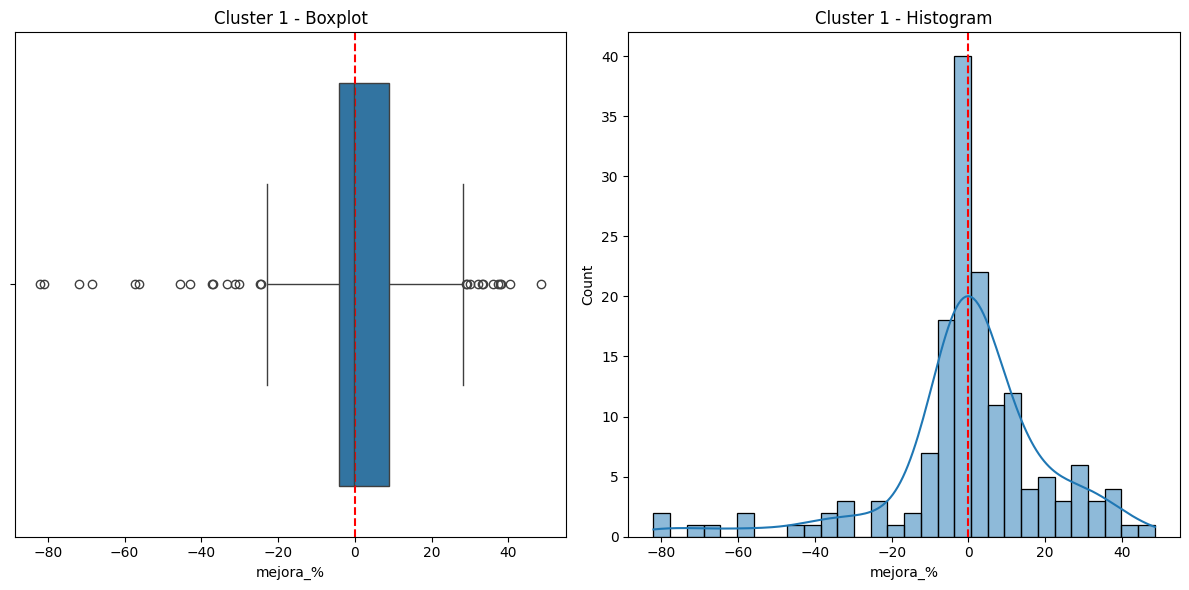

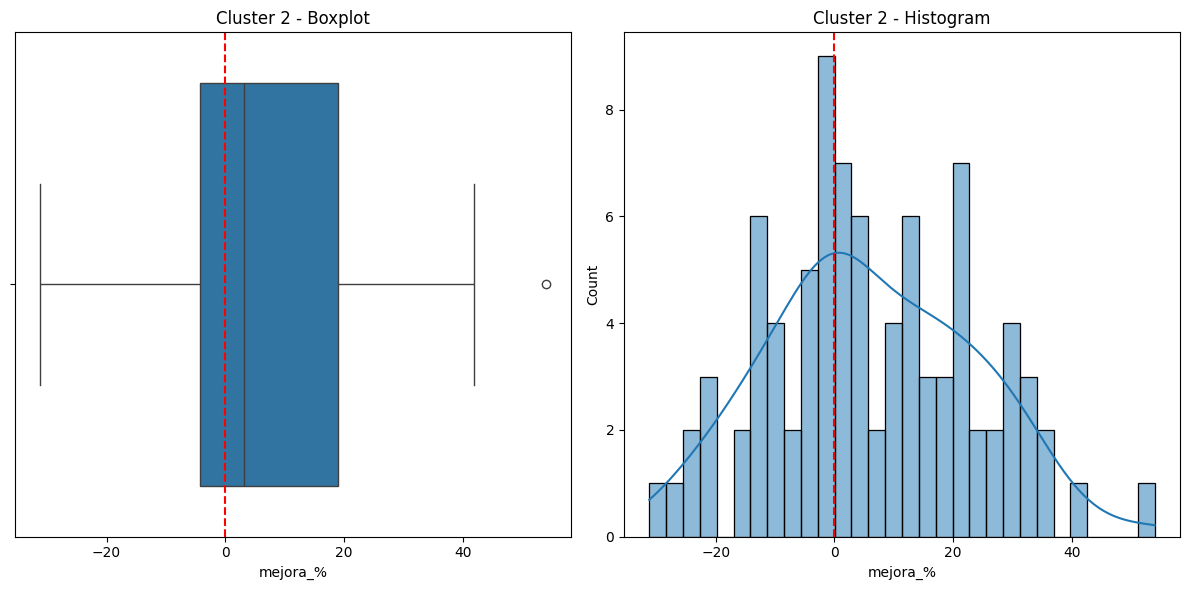

In [231]:

# List of datasets and titles
datasets = [test_0, test_1, test_2]
titles = ["Cluster 0", "Cluster 1", "Cluster 2"]

for data, title in zip(datasets, titles):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Create a separate figure for each cluster

    # Boxplot
    sns.boxplot(data=data, x='mejora_%', ax=axes[0])
    axes[0].axvline(0, color='red', linestyle='--')
    axes[0].set_title(f"{title} - Boxplot")

    # Histogram
    sns.histplot(data['mejora_%'], bins=30, kde=True, ax=axes[1])
    axes[1].axvline(0, color='red', linestyle='--')
    axes[1].set_title(f"{title} - Histogram")

    plt.tight_layout()
    plt.show()  # Show each figure separately

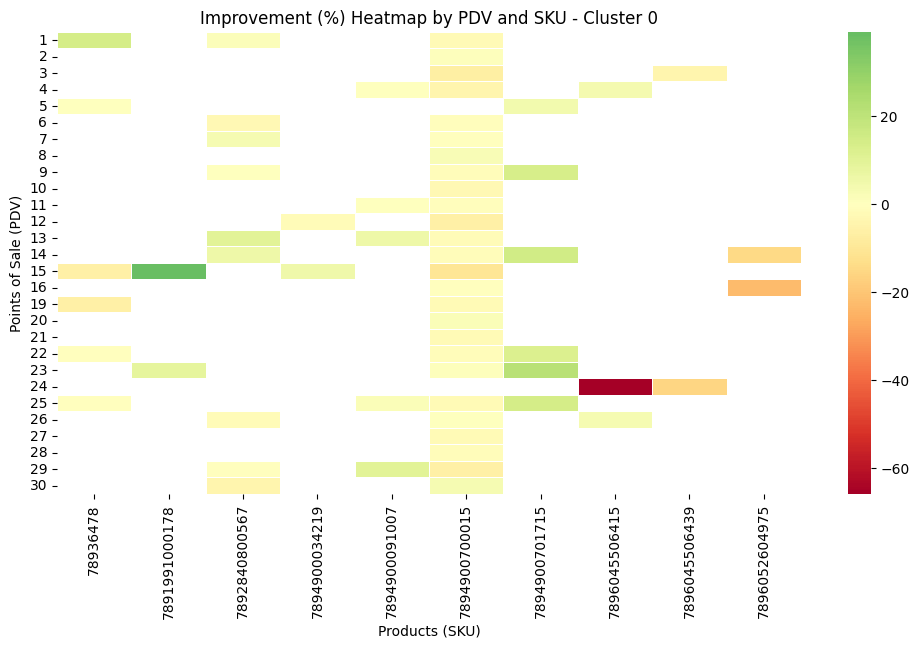

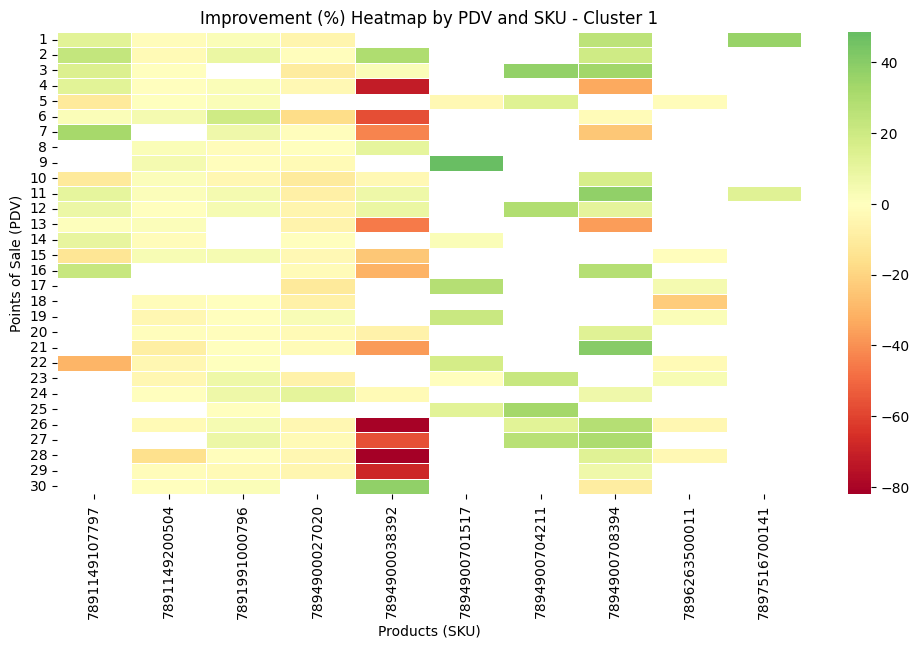

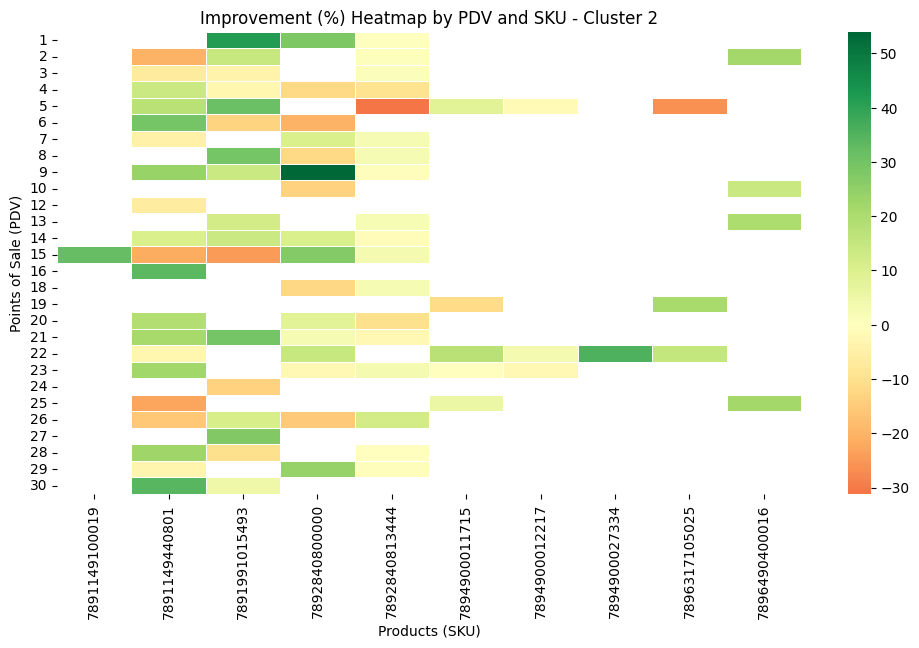

In [232]:
# List of datasets and titles
datasets = [test_0, test_1, test_2]
titles = ["Cluster 0", "Cluster 1", "Cluster 2"]

# Loop through datasets and create separate plots
for data, title in zip(datasets, titles):
    plt.figure(figsize=(12, 6))  # Create a new figure for each heatmap
    pivot_data = data.pivot_table(index='pdv_codigo', columns='codigo_barras_sku', values='mejora_%')

    sns.heatmap(pivot_data, cmap="RdYlGn", center=0, annot=False, linewidths=0.5)
    
    plt.title(f"Improvement (%) Heatmap by PDV and SKU - {title}")
    plt.xlabel("Products (SKU)")
    plt.ylabel("Points of Sale (PDV)")
    
    plt.show()  # Show each heatmap separately

# TFT 

In [255]:
# 3597 seg
tft_0 = pd.read_csv('/Users/santiagoromano/Documents/code/MasterThesis/results/metrics_cluster_0_tft.csv')
tft_0 = tft_0[['pdv_codigo', 'codigo_barras_sku',
         'rmse_cant_vta_pred_tft_mean']]
print(tft_0['codigo_barras_sku'].nunique(), tft_0.shape, tft_0[['codigo_barras_sku','pdv_codigo']].drop_duplicates().shape)
# 2913 seg
tft_1 = pd.read_csv('/Users/santiagoromano/Documents/code/MasterThesis/results/metrics_cluster_1_tft.csv')
tft_1 = tft_1[['pdv_codigo', 'codigo_barras_sku', 'mse_cant_vta_pred_tft_mean',
         'rmse_cant_vta_pred_tft_mean']]
print(tft_1['codigo_barras_sku'].nunique(), tft_1.shape, tft_1[['codigo_barras_sku','pdv_codigo']].drop_duplicates().shape)

# 3336 seg
tft_2 = pd.read_csv('/Users/santiagoromano/Documents/code/MasterThesis/results/metrics_cluster_2_tft.csv')
tft_2 = tft_2[['pdv_codigo', 'codigo_barras_sku', 'mse_cant_vta_pred_tft_mean',
            'rmse_cant_vta_pred_tft_mean']]
print(tft_2['codigo_barras_sku'].nunique(), tft_2.shape, tft_2[['codigo_barras_sku','pdv_codigo']].drop_duplicates().shape)

10 (63, 3) (63, 2)
10 (156, 4) (156, 2)
10 (88, 4) (88, 2)


In [256]:
print(tft_0['rmse_cant_vta_pred_tft_mean'].median(),tft_0['rmse_cant_vta_pred_tft_mean'].mean())
print(tft_1['rmse_cant_vta_pred_tft_mean'].median(),tft_1['rmse_cant_vta_pred_tft_mean'].mean())
print(tft_2['rmse_cant_vta_pred_tft_mean'].median(),tft_2['rmse_cant_vta_pred_tft_mean'].mean())

7855.6 8981.539682539682
34451.9 126725.30320512819
17280.65 18893.320454545457


best_rmse
rmse_cant_vta_pred_tft_mean        37
rmse_cant_vta_pred_mean_pdv_sku    26
Name: count, dtype: int64
best_rmse
rmse_cant_vta_pred_tft_mean        98
rmse_cant_vta_pred_mean_pdv_sku    58
Name: count, dtype: int64
best_rmse
rmse_cant_vta_pred_tft_mean        65
rmse_cant_vta_pred_mean_pdv_sku    23
Name: count, dtype: int64


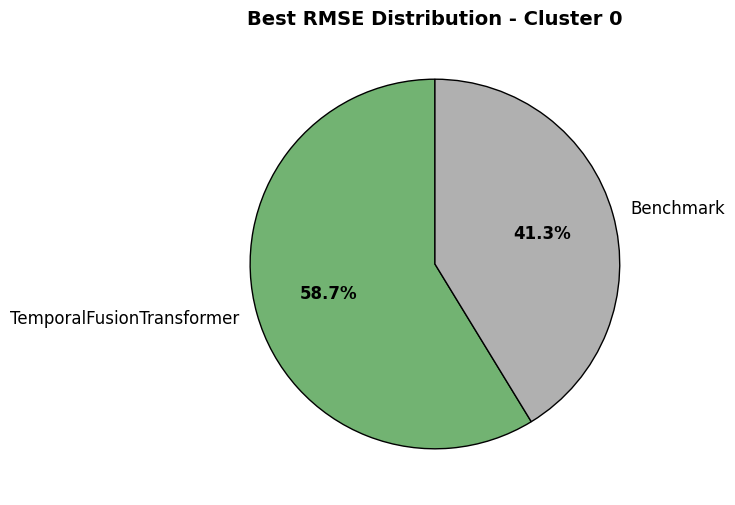

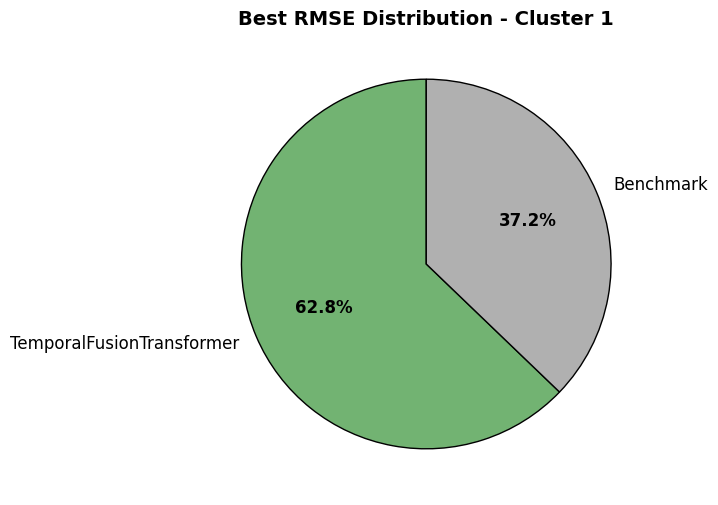

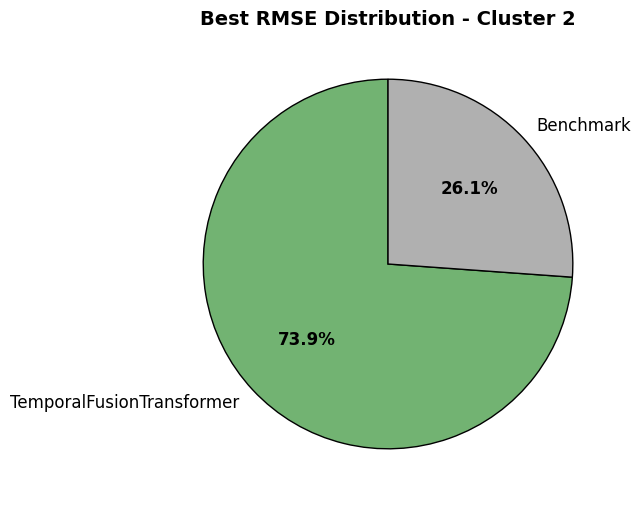

In [257]:
#a)
test_0 = tft_0.merge(mean_0, on=['pdv_codigo', 'codigo_barras_sku'], how='inner')
summary_0 = create_summary_dataframe(test_0)
print(summary_0['best_rmse'].value_counts())

test_1 = tft_1.merge(mean_1, on=['pdv_codigo', 'codigo_barras_sku'], how='inner')
summary_1 = create_summary_dataframe(test_1)
print(summary_1['best_rmse'].value_counts())

test_2 = tft_2.merge(mean_2, on=['pdv_codigo', 'codigo_barras_sku'], how='inner')
summary_2 = create_summary_dataframe(test_2)
print(summary_2['best_rmse'].value_counts())

# Define professional-looking colors
color_mapping = {
    "rmse_cant_vta_pred_mean_pdv_sku": "#B0B0B0",  # Light Grey for Benchmark
    "rmse_cant_vta_pred_tft_mean": "#72B372"      # Soft Green for SimpleFeedForward
}
label_mapping = {
    "rmse_cant_vta_pred_mean_pdv_sku": "Benchmark",
    "rmse_cant_vta_pred_tft_mean": "TemporalFusionTransformer"
}

# List of summaries and titles
summaries = [summary_0, summary_1, summary_2]
titles = ["Cluster 0", "Cluster 1", "Cluster 2"]

# Generate separate pie charts with the same size
for summary, title in zip(summaries, titles):
    fig, ax = plt.subplots(figsize=(6, 6))  # Ensure same size for all figures
    
    # Count values for 'best_rmse' and rename labels
    value_counts = summary['best_rmse'].value_counts()
    labels = [label_mapping[label] for label in value_counts.index]  # Map to new labels
    colors = [color_mapping[label] for label in value_counts.index]  # Map to colors
    
    # Create the pie chart
    wedges, texts, autotexts = ax.pie(
        value_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1},  # Adds border for clarity
        textprops={'fontsize': 12, 'color': 'black'}  # Improve text readability
    )
    
    # Make percentage labels bold
    for autotext in autotexts:
        autotext.set_fontweight("bold")
    
    # Add title with better formatting
    ax.set_title(f"Best RMSE Distribution - {title}", fontsize=14, fontweight="bold")
    
    # Show the plot
    plt.show()

In [258]:
#   b)
test_0['mejora_%'] =  round(((test_0['rmse_cant_vta_pred_mean_pdv_sku'] - test_0['rmse_cant_vta_pred_tft_mean']) / test_0['rmse_cant_vta_pred_mean_pdv_sku'])*100,3)
# print(test_0['mejora_%'].describe())

test_1['mejora_%'] =  round(((test_1['rmse_cant_vta_pred_mean_pdv_sku'] - test_1['rmse_cant_vta_pred_tft_mean']) / test_1['rmse_cant_vta_pred_mean_pdv_sku'])*100,3)
# print(test_1['mejora_%'].describe())

test_2['mejora_%'] =  round(((test_2['rmse_cant_vta_pred_mean_pdv_sku'] - test_2['rmse_cant_vta_pred_tft_mean']) / test_2['rmse_cant_vta_pred_mean_pdv_sku'])*100,3)
# print(test_2['mejora_%'].describe())


# 2. Estadísticos
print(f"cluster 0: tft gana en {(test_0['mejora_%'] > 0).mean():.1%} de casos")
print(f"Mediana de la mejora: {test_0[test_0['mejora_%'] > 0]['mejora_%'].median():.1f}%")

print(f"cluster 1: tft gana en {(test_1['mejora_%'] > 0).mean():.1%} de casos")
print(f"Mediana de la mejora: {test_1[test_1['mejora_%'] > 0]['mejora_%'].median():.1f}%")

print(f"cluster 2: tft gana en {(test_2['mejora_%'] > 0).mean():.1%} de casos")
print(f"Mediana de la mejora: {test_2[test_2['mejora_%'] > 0]['mejora_%'].median():.1f}%")

cluster 0: tft gana en 58.7% de casos
Mediana de la mejora: 2.9%
cluster 1: tft gana en 62.8% de casos
Mediana de la mejora: 10.2%
cluster 2: tft gana en 73.9% de casos
Mediana de la mejora: 13.3%


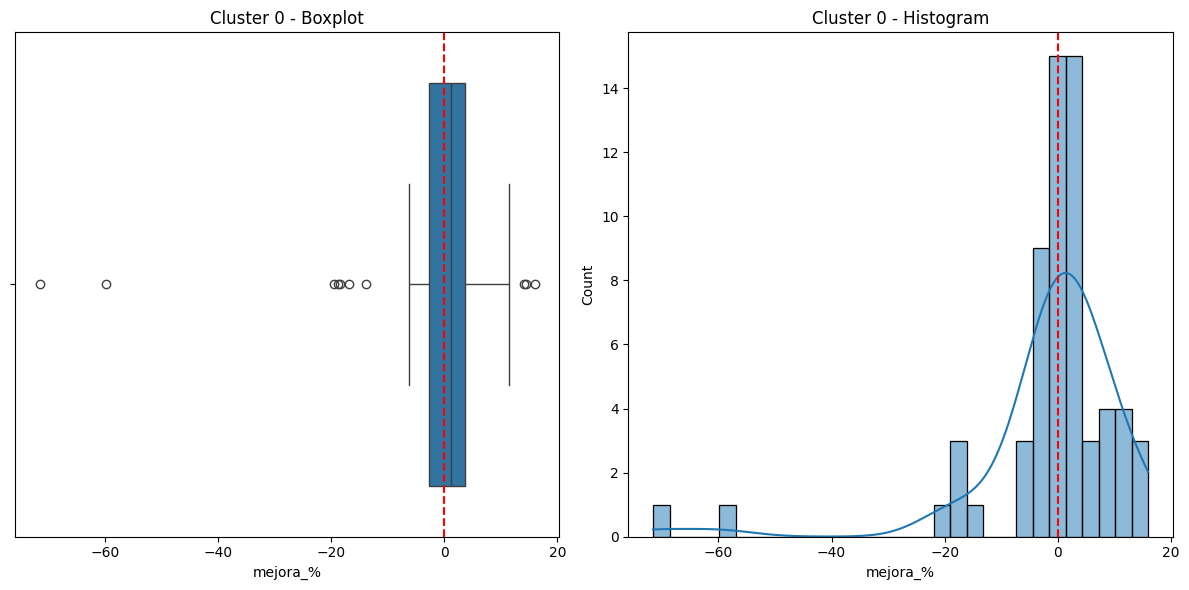

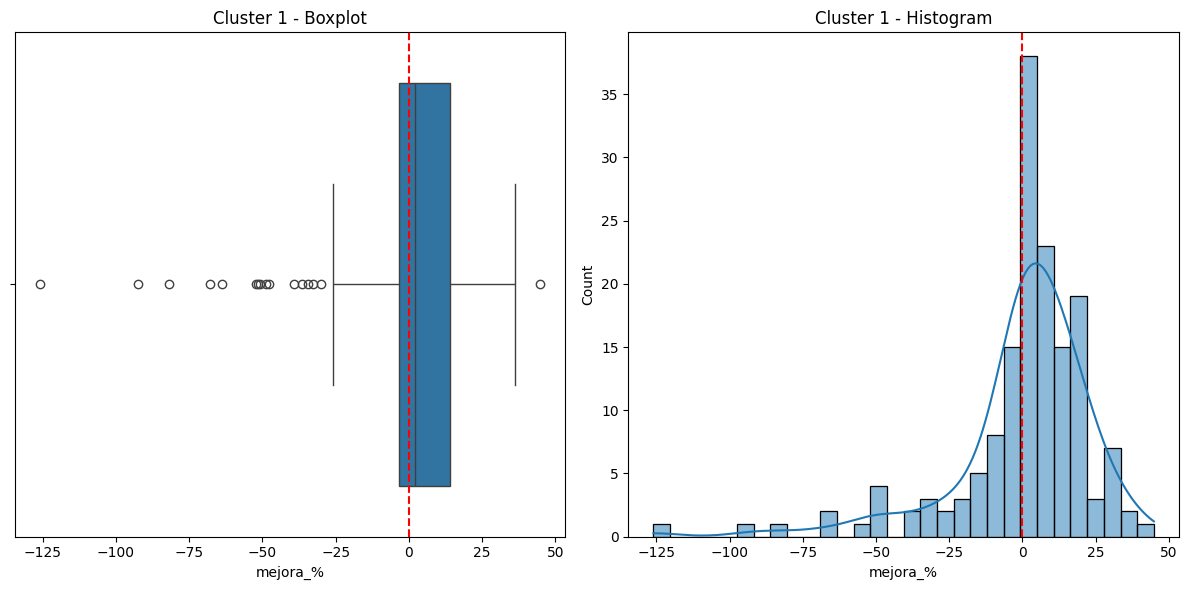

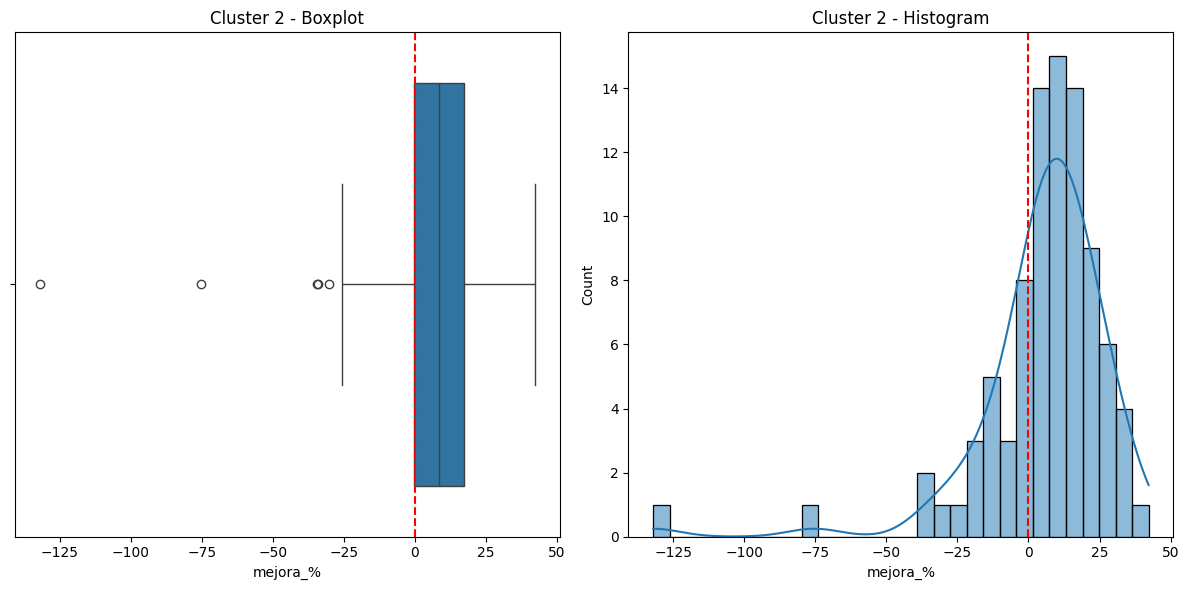

In [259]:
# List of datasets and titles
datasets = [test_0, test_1, test_2]
titles = ["Cluster 0", "Cluster 1", "Cluster 2"]

for data, title in zip(datasets, titles):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Create a separate figure for each cluster

    # Boxplot
    sns.boxplot(data=data, x='mejora_%', ax=axes[0])
    axes[0].axvline(0, color='red', linestyle='--')
    axes[0].set_title(f"{title} - Boxplot")

    # Histogram
    sns.histplot(data['mejora_%'], bins=30, kde=True, ax=axes[1])
    axes[1].axvline(0, color='red', linestyle='--')
    axes[1].set_title(f"{title} - Histogram")

    plt.tight_layout()
    plt.show()  # Show each figure separately

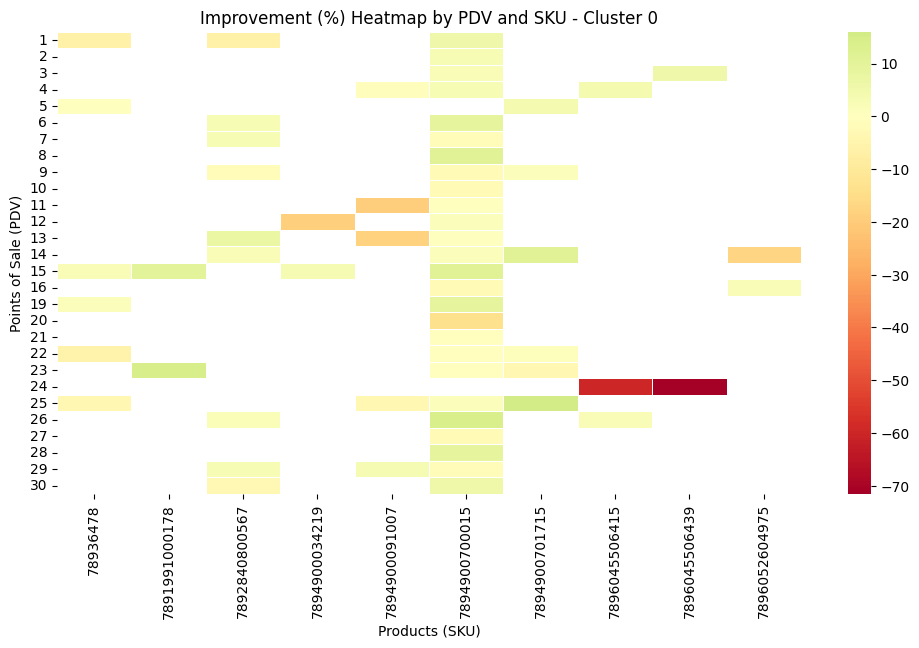

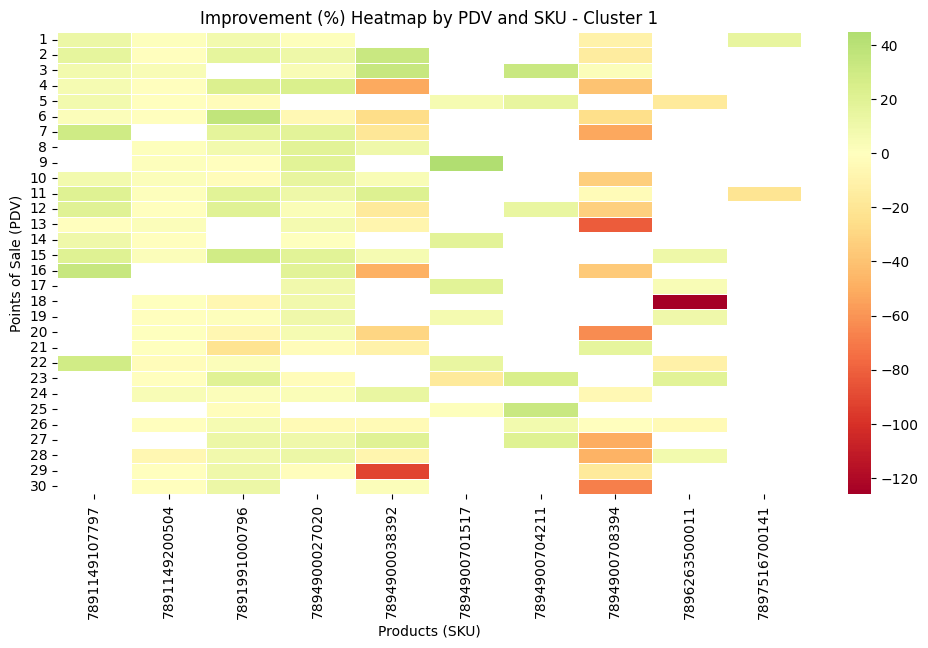

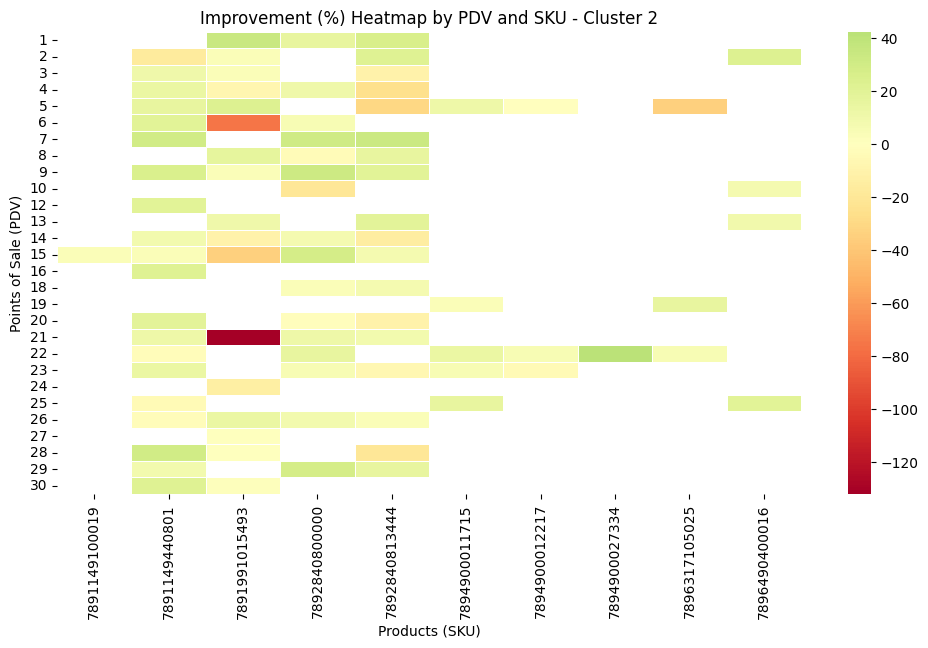

In [260]:
# List of datasets and titles
datasets = [test_0, test_1, test_2]
titles = ["Cluster 0", "Cluster 1", "Cluster 2"]

# Loop through datasets and create separate plots
for data, title in zip(datasets, titles):
    plt.figure(figsize=(12, 6))  # Create a new figure for each heatmap
    pivot_data = data.pivot_table(index='pdv_codigo', columns='codigo_barras_sku', values='mejora_%')

    sns.heatmap(pivot_data, cmap="RdYlGn", center=0, annot=False, linewidths=0.5)
    
    plt.title(f"Improvement (%) Heatmap by PDV and SKU - {title}")
    plt.xlabel("Products (SKU)")
    plt.ylabel("Points of Sale (PDV)")
    
    plt.show()  # Show each heatmap separately

# wave net

In [110]:
# 2069 seg
wavenet_0 = pd.read_csv('/Users/santiagoromano/Documents/code/MasterThesis/results/metrics_cluster_0_wavenet.csv')
wavenet_0 = wavenet_0[['pdv_codigo', 'codigo_barras_sku', 'mse_cant_vta_pred_wavenet_mean',
            'rmse_cant_vta_pred_wavenet_mean']]
print(wavenet_0['codigo_barras_sku'].nunique(), wavenet_0.shape, wavenet_0[['codigo_barras_sku','pdv_codigo']].drop_duplicates().shape)

# 2092 seg
wavenet_1 = pd.read_csv('/Users/santiagoromano/Documents/code/MasterThesis/results/metrics_cluster_1_wavenet.csv')
wavenet_1 = wavenet_1[['pdv_codigo', 'codigo_barras_sku', 'mse_cant_vta_pred_wavenet_mean',
            'rmse_cant_vta_pred_wavenet_mean']]
print(wavenet_1['codigo_barras_sku'].nunique(), wavenet_1.shape, wavenet_1[['codigo_barras_sku','pdv_codigo']].drop_duplicates().shape)

# 1949 seg
wavenet_2 = pd.read_csv('/Users/santiagoromano/Documents/code/MasterThesis/results/metrics_cluster_2_wavenet.csv')
wavenet_2 = wavenet_2[['pdv_codigo', 'codigo_barras_sku', 'mse_cant_vta_pred_wavenet_mean',
            'rmse_cant_vta_pred_wavenet_mean']]
print(wavenet_2['codigo_barras_sku'].nunique(), wavenet_2.shape, wavenet_2[['codigo_barras_sku','pdv_codigo']].drop_duplicates().shape)

10 (63, 4) (63, 2)
10 (156, 4) (156, 2)
10 (88, 4) (88, 2)


In [58]:
def analyze_model(df, model_name):
    """Analyzes RMSE metrics for a single model"""
    # Find RMSE column automatically
    rmse_col = [col for col in df.columns if 'rmse' in col.lower()][0]
    rmse_values = df[rmse_col]
    
    print(f"\n=== Analysis for {model_name} model ===")
    print("Basic Statistics:")
    print(rmse_values.describe())
    
    print("\nKey Percentiles:")
    print(rmse_values.quantile([0.05, 0.25, 0.5, 0.75, 0.95]))
    
    # Visualization
    plt.figure(figsize=(12, 5))
    
    # Boxplot
    plt.subplot(1, 2, 1)
    sns.boxplot(y=rmse_values)
    plt.title(f'RMSE Distribution - {model_name}')
    plt.ylabel('RMSE Value')
    
    # Histogram with KDE
    plt.subplot(1, 2, 2)
    ax = sns.histplot(rmse_values, kde=True, bins=30)
    
    # Add mean/median lines
    mean_val = rmse_values.mean()
    median_val = rmse_values.median()
    ax.axvline(mean_val, color='r', linestyle='--', label=f'Mean: {mean_val:.2f}')
    ax.axvline(median_val, color='g', linestyle='-', label=f'Median: {median_val:.2f}')
    
    plt.title(f'RMSE Histogram - {model_name}')
    plt.xlabel('RMSE Value')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    return rmse_values

In [99]:
def compare_6models_hist_boxplot(df1, model1_name,
                                df2, model2_name,
                                df3, model3_name,
                                df4, model4_name,
                                df5, model5_name,
                                df6, model6_name,
                                cluster=None):
    """
    Compare 6 models with cluster-specific titles if provided
    
    Parameters:
    -----------
    df1-df6 : DataFrames with RMSE columns
    model1_name-model6_name : Model display names
    cluster : Optional cluster number to include in titles
    """
    
    # Extract RMSE values
    def get_rmse(df):
        rmse_col = [col for col in df.columns if 'rmse' in col.lower()][0]
        return df[rmse_col]
    
    rmse_data = {
        model1_name: get_rmse(df1),
        model2_name: get_rmse(df2),
        model3_name: get_rmse(df3),
        model4_name: get_rmse(df4),
        model5_name: get_rmse(df5),
        model6_name: get_rmse(df6)
    }
    
    # Calculate global min/max for consistent x-axis
    all_values = np.concatenate(list(rmse_data.values()))
    global_min = np.min(all_values)
    global_max = np.max(all_values)
    
    # Create figure with adjusted grid layout
    fig = plt.figure(figsize=(18, 24))
    gs = fig.add_gridspec(6, 2, width_ratios=[3, 1])
    
    # Add cluster to title if specified
    title_suffix = f" (Cluster {cluster})" if cluster is not None else ""
    
    # Plot histograms with shared x-axis
    for i, (name, values) in enumerate(rmse_data.items(), 1):
        ax_hist = fig.add_subplot(gs[i-1, 0])
        sns.histplot(values, bins=20, kde=True, ax=ax_hist)
        ax_hist.set_xlim(global_min, global_max)
        
        mean = values.mean()
        median = values.median()
        
        ax_hist.axvline(mean, color='r', linestyle='--', label=f'Mean: {mean:.2f}')
        ax_hist.axvline(median, color='g', linestyle='-', label=f'Median: {median:.2f}')
        
        ax_hist.text(0.95, 0.95, f'Mean: {mean:.2f}\nMedian: {median:.2f}',
                    transform=ax_hist.transAxes,
                    verticalalignment='top',
                    horizontalalignment='right',
                    bbox=dict(facecolor='white', alpha=0.8))
        
        ax_hist.set_title(f'{name} - RMSE Distribution{title_suffix}')
        ax_hist.set_xlabel('RMSE')
        ax_hist.legend(loc='upper left')
    
    # Plot narrower boxplots
    for i, (name, values) in enumerate(rmse_data.items(), 1):
        ax_box = fig.add_subplot(gs[i-1, 1])
        sns.boxplot(y=values, ax=ax_box, width=0.5)
        
        current_mean = values.mean()
        current_median = values.median()
        
        ax_box.text(0.1, 0.95, f'Mean: {current_mean:.2f}\nMedian: {current_median:.2f}',
                  transform=ax_box.transAxes,
                  verticalalignment='top',
                  bbox=dict(facecolor='white', alpha=0.8))
        
        ax_box.set_title(f'{name} - Spread{title_suffix}')
        ax_box.set_ylabel('')
    
    plt.tight_layout()
    plt.show()
    
    # Print summary with cluster info if provided
    print(f"\n=== RMSE Summary {title_suffix} ===")
    summary = pd.DataFrame({
        'Mean': [values.mean() for values in rmse_data.values()],
        'Median': [values.median() for values in rmse_data.values()],
        'Std Dev': [values.std() for values in rmse_data.values()],
        'Min': [values.min() for values in rmse_data.values()],
        'Max': [values.max() for values in rmse_data.values()]
    }, index=rmse_data.keys())
    
    print(summary.round(2))

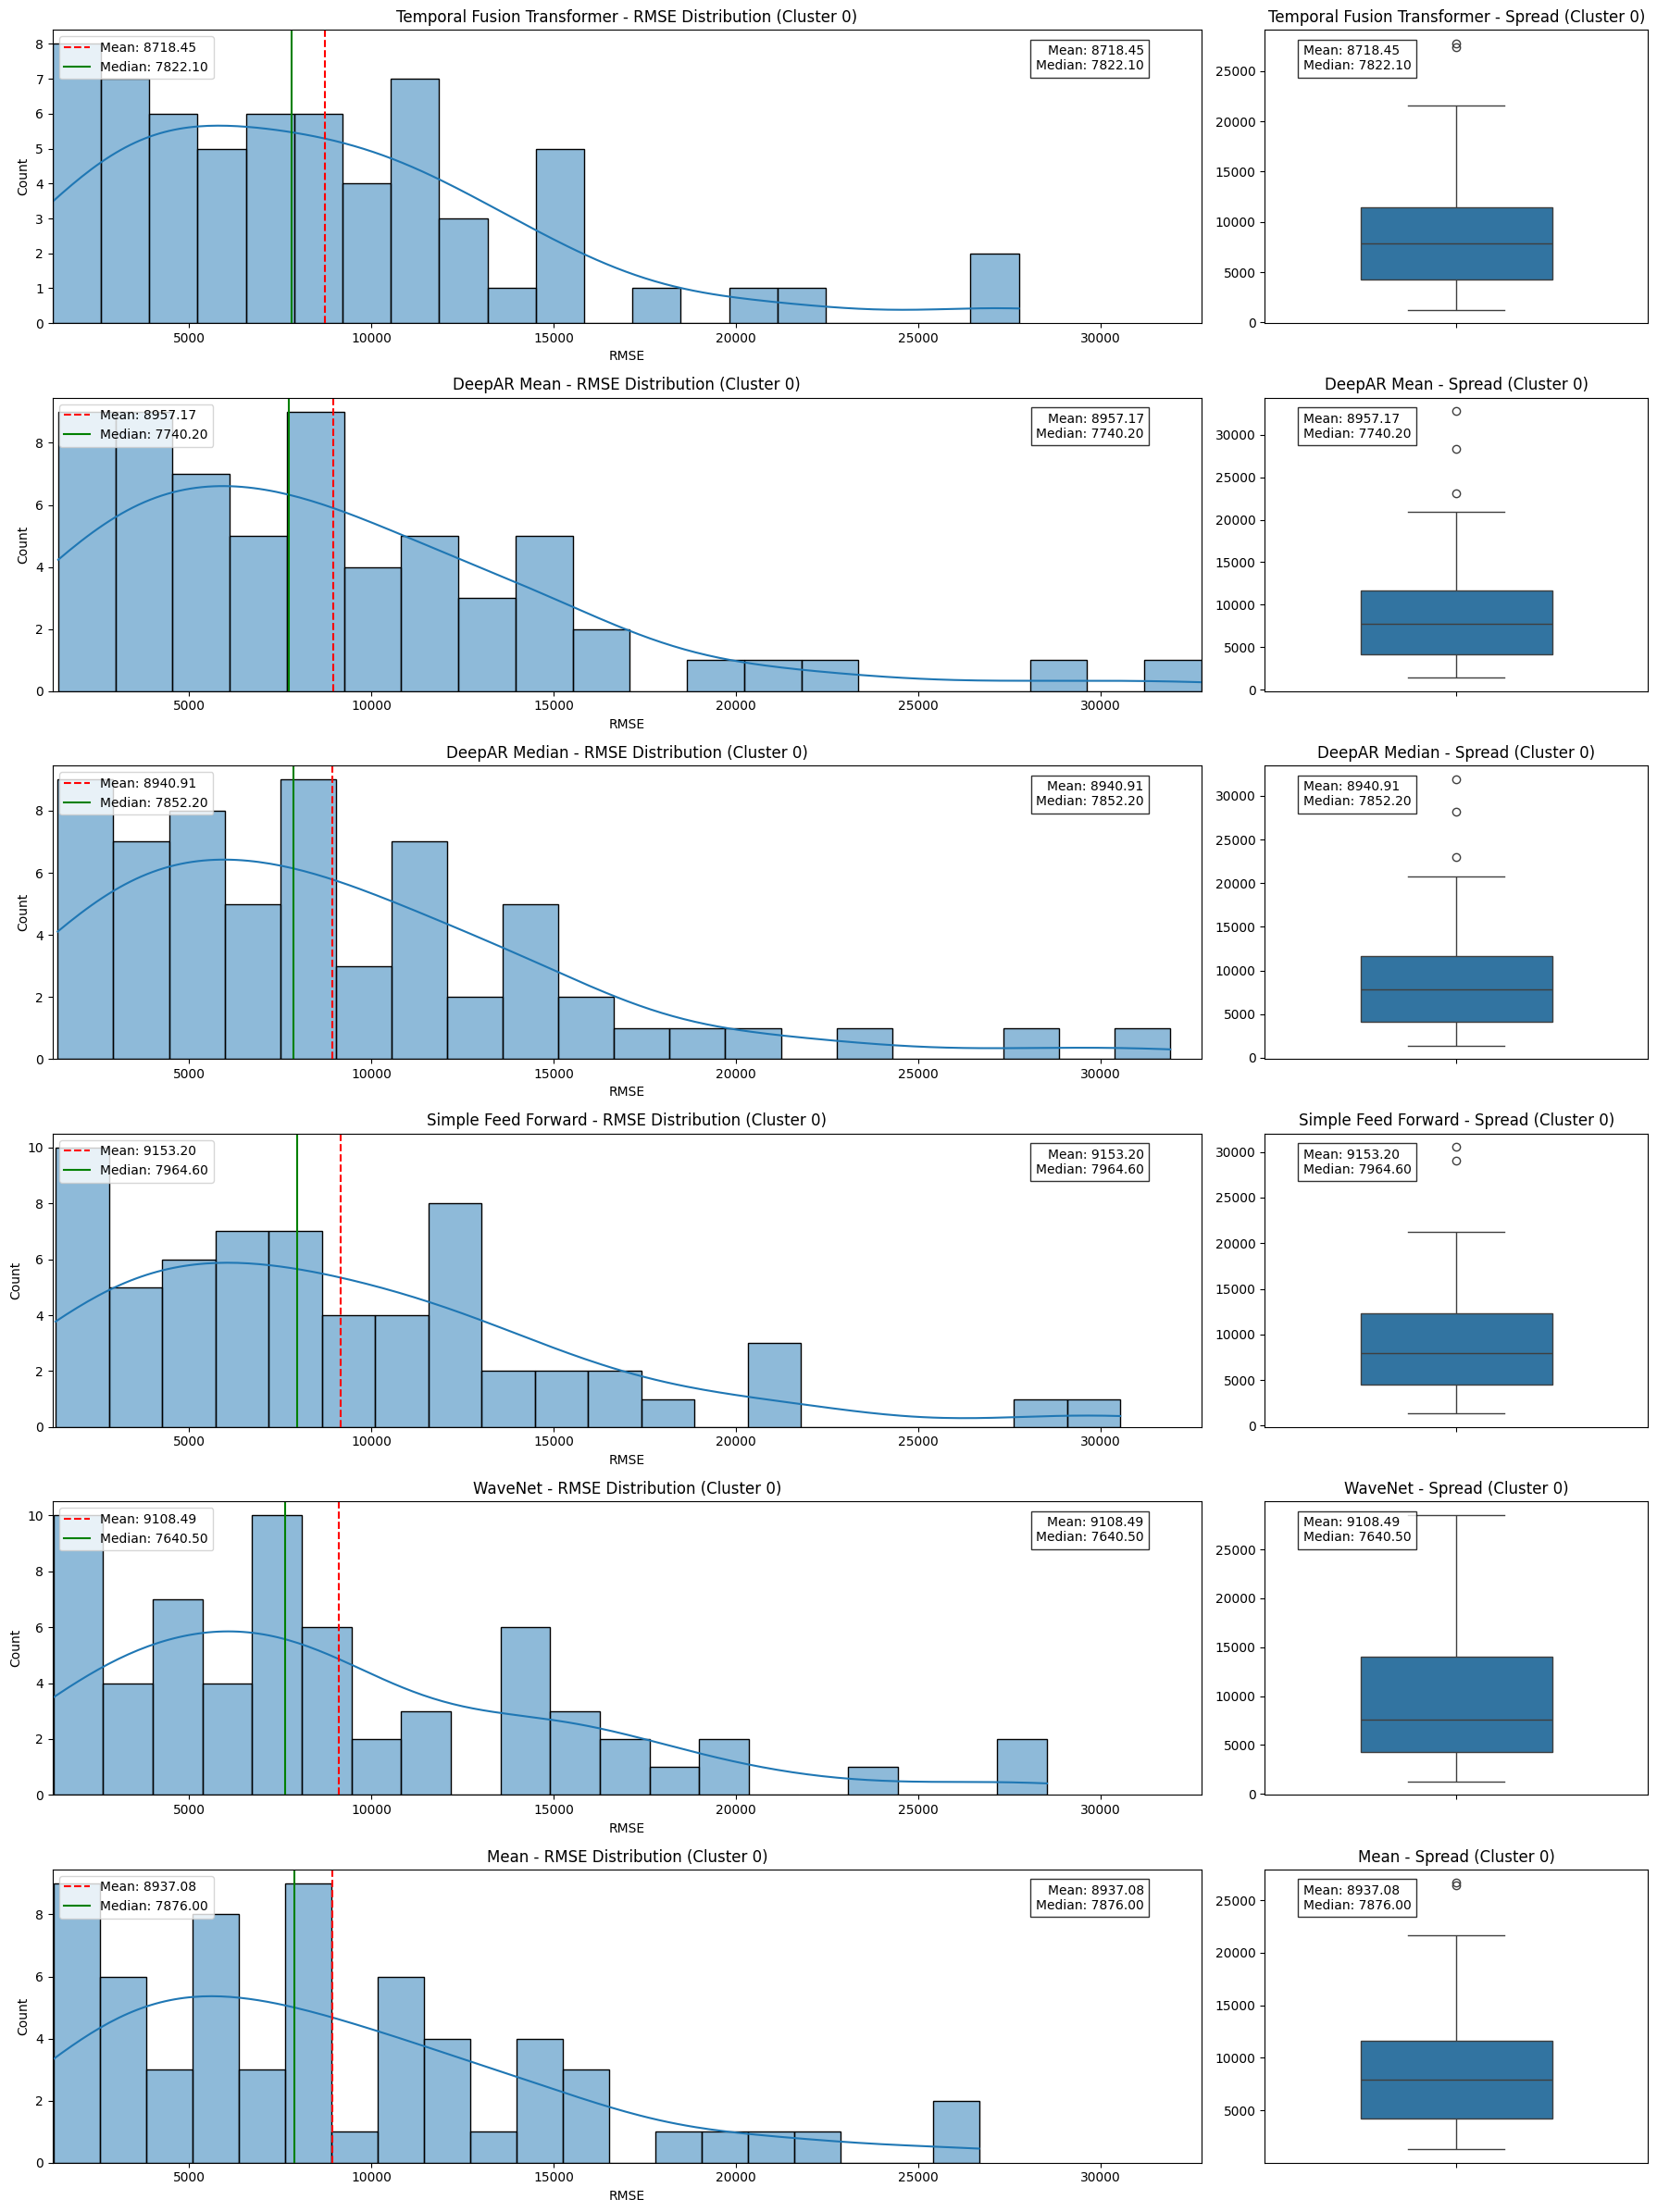


=== RMSE Summary  (Cluster 0) ===
                                Mean  Median  Std Dev     Min      Max
Temporal Fusion Transformer  8718.45  7822.1  5932.83  1255.4  27768.5
DeepAR Mean                  8957.17  7740.2  6443.19  1408.0  32775.6
DeepAR Median                8940.91  7852.2  6389.58  1393.7  31922.2
Simple Feed Forward          9153.20  7964.6  6440.78  1336.5  30550.3
WaveNet                      9108.49  7640.5  6345.15  1276.4  28540.1
Mean                         8937.08  7876.0  6126.84  1279.6  26676.0


In [100]:
model_comparison = compare_6models_hist_boxplot(
    tft_0, 'Temporal Fusion Transformer',
    deepar_mean_0, 'DeepAR Mean',
    deepar_median_0, 'DeepAR Median',
    sff_0, 'Simple Feed Forward',
    wavenet_0, 'WaveNet',
    mean_0, 'Mean',
    cluster=0
)

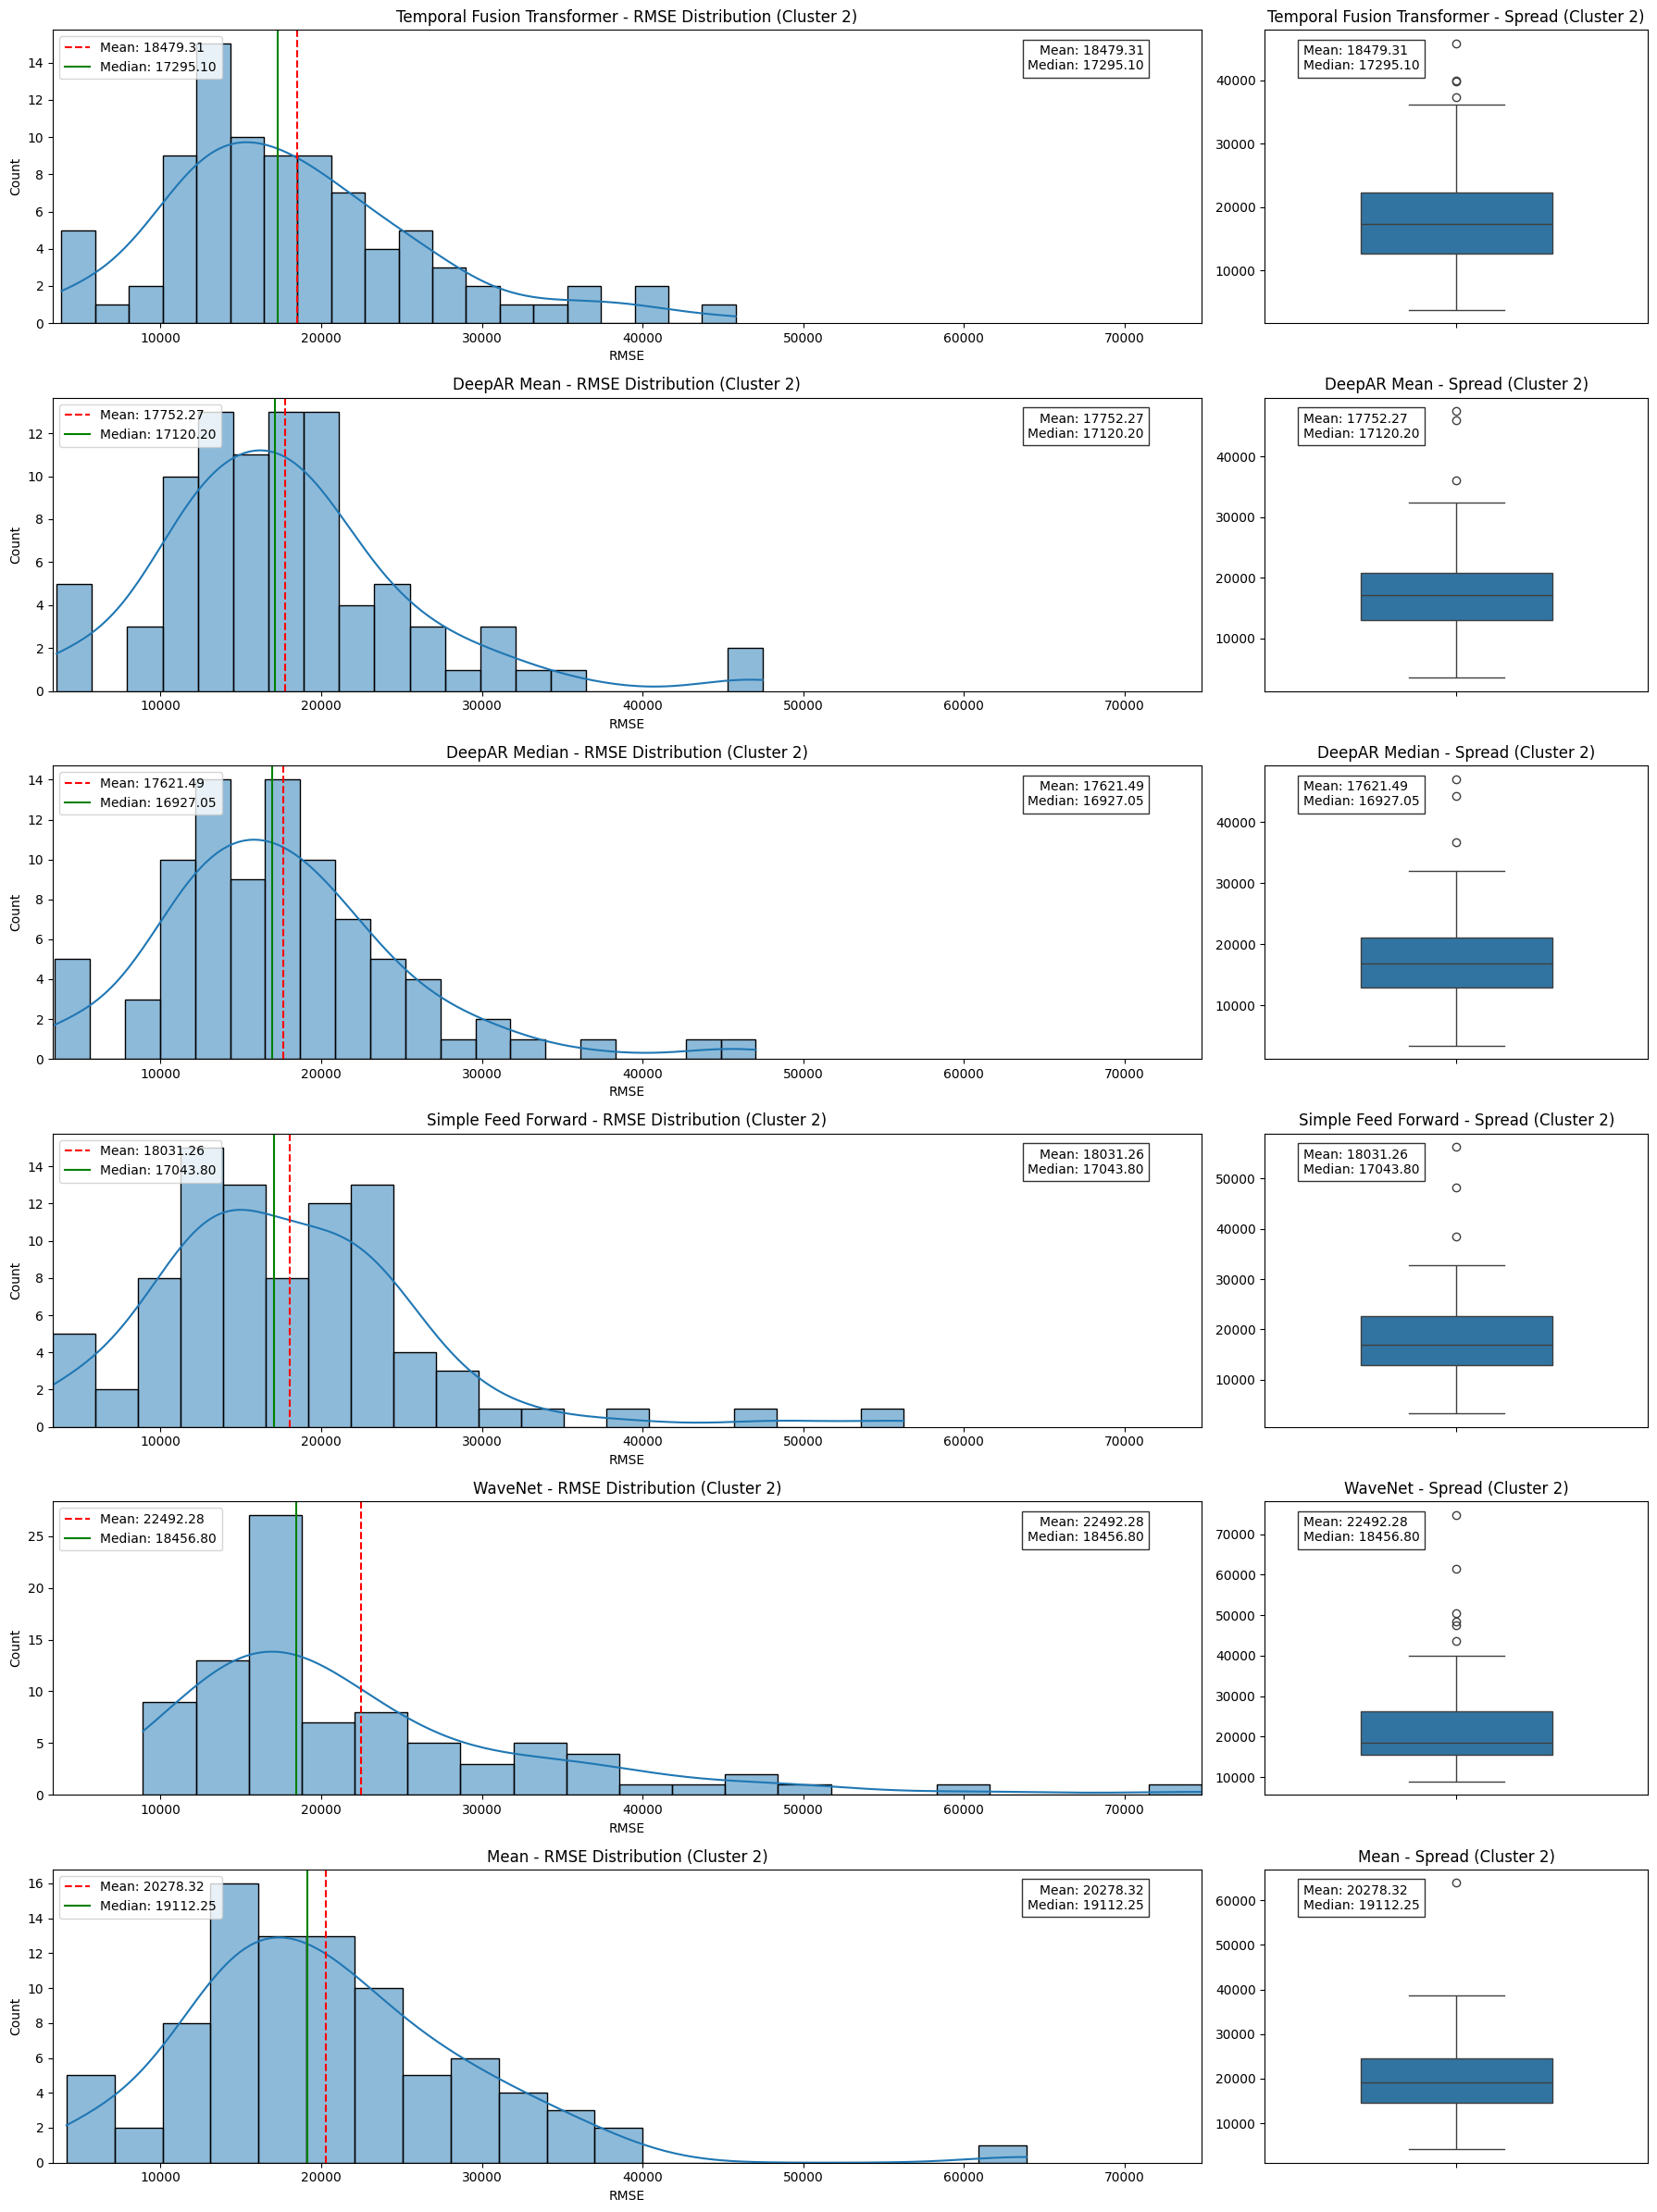


=== RMSE Summary  (Cluster 2) ===
                                 Mean    Median   Std Dev     Min      Max
Temporal Fusion Transformer  18479.31  17295.10   8263.59  3835.4  45799.5
DeepAR Mean                  17752.27  17120.20   7860.21  3533.2  47475.1
DeepAR Median                17621.49  16927.05   7768.19  3420.3  47046.8
Simple Feed Forward          18031.26  17043.80   8537.69  3291.3  56267.7
WaveNet                      22492.28  18456.80  11672.07  8907.2  74786.5
Mean                         20278.32  19112.25   8960.99  4146.9  63917.5


In [102]:
model_comparison = compare_6models_hist_boxplot(
    tft_2, 'Temporal Fusion Transformer',
    deepar_mean_2, 'DeepAR Mean',
    deepar_median_2, 'DeepAR Median',
    sff_2, 'Simple Feed Forward',
    wavenet_2, 'WaveNet',
    mean_2, 'Mean',
    cluster=2
)

(best_rmse
 rmse_cant_vta_pred_sff_mean        134
 rmse_cant_vta_pred_mean_pdv_sku     22
 Name: count, dtype: int64,
 best_mse
 mse_cant_vta_pred_sff_mean        134
 mse_cant_vta_pred_mean_pdv_sku     22
 Name: count, dtype: int64)

(best_rmse
 rmse_cant_vta_pred_sff_mean        72
 rmse_cant_vta_pred_mean_pdv_sku    16
 Name: count, dtype: int64,
 best_mse
 mse_cant_vta_pred_sff_mean        72
 mse_cant_vta_pred_mean_pdv_sku    16
 Name: count, dtype: int64)

# mean vs tft

In [125]:
test_0 = tft_0.merge(mean_0, on=['pdv_codigo', 'codigo_barras_sku'], how='inner')
summary_0 = create_summary_dataframe(test_0)
summary_0['best_rmse'].value_counts(), summary_0['best_mse'].value_counts()

(best_rmse
 rmse_cant_vta_pred_tft_mean        35
 rmse_cant_vta_pred_mean_pdv_sku    28
 Name: count, dtype: int64,
 best_mse
 mse_cant_vta_pred_tft_mean        35
 mse_cant_vta_pred_mean_pdv_sku    28
 Name: count, dtype: int64)

In [126]:
test_1 = tft_1.merge(mean_1, on=['pdv_codigo', 'codigo_barras_sku'], how='inner')
summary_1 = create_summary_dataframe(test_1)
summary_1['best_rmse'].value_counts(), summary_1['best_mse'].value_counts()

(best_rmse
 rmse_cant_vta_pred_tft_mean        99
 rmse_cant_vta_pred_mean_pdv_sku    57
 Name: count, dtype: int64,
 best_mse
 mse_cant_vta_pred_tft_mean        99
 mse_cant_vta_pred_mean_pdv_sku    57
 Name: count, dtype: int64)

In [127]:
test_2 = tft_2.merge(mean_2, on=['pdv_codigo', 'codigo_barras_sku'], how='inner')
summary_2 = create_summary_dataframe(test_2)
summary_2['best_rmse'].value_counts(), summary_2['best_mse'].value_counts()

(best_rmse
 rmse_cant_vta_pred_tft_mean        72
 rmse_cant_vta_pred_mean_pdv_sku    16
 Name: count, dtype: int64,
 best_mse
 mse_cant_vta_pred_tft_mean        72
 mse_cant_vta_pred_mean_pdv_sku    16
 Name: count, dtype: int64)

# mean vs deepar mean

In [128]:
test_0 = deepar_mean_0.merge(mean_0, on=['pdv_codigo', 'codigo_barras_sku'], how='inner')
summary_0 = create_summary_dataframe(test_0)
summary_0['best_rmse'].value_counts(), summary_0['best_mse'].value_counts()

(best_rmse
 rmse_cant_vta_pred_mean_pdv_sku    35
 rmse_cant_vta_pred_deepar_mean     28
 Name: count, dtype: int64,
 best_mse
 mse_cant_vta_pred_mean_pdv_sku    35
 mse_cant_vta_pred_deepar_mean     28
 Name: count, dtype: int64)

In [129]:
test_1 = deepar_mean_1.merge(mean_1, on=['pdv_codigo', 'codigo_barras_sku'], how='inner')
summary_1 = create_summary_dataframe(test_1)
summary_1['best_rmse'].value_counts(), summary_1['best_mse'].value_counts()

(best_rmse
 rmse_cant_vta_pred_deepar_mean     128
 rmse_cant_vta_pred_mean_pdv_sku     28
 Name: count, dtype: int64,
 best_mse
 mse_cant_vta_pred_deepar_mean     128
 mse_cant_vta_pred_mean_pdv_sku     28
 Name: count, dtype: int64)

In [130]:
test_2 = deepar_mean_2.merge(mean_2, on=['pdv_codigo', 'codigo_barras_sku'], how='inner')
summary_2 = create_summary_dataframe(test_2)
summary_2['best_rmse'].value_counts(), summary_2['best_mse'].value_counts()

(best_rmse
 rmse_cant_vta_pred_deepar_mean     73
 rmse_cant_vta_pred_mean_pdv_sku    15
 Name: count, dtype: int64,
 best_mse
 mse_cant_vta_pred_deepar_mean     73
 mse_cant_vta_pred_mean_pdv_sku    15
 Name: count, dtype: int64)

# mean vs deep median

In [131]:
test_0 = deepar_median_0.merge(mean_0, on=['pdv_codigo', 'codigo_barras_sku'], how='inner')
summary_0 = create_summary_dataframe(test_0)
summary_0['best_rmse'].value_counts(), summary_0['best_mse'].value_counts()

(best_rmse
 rmse_cant_vta_pred_mean_pdv_sku     34
 rmse_cant_vta_pred_deepar_median    29
 Name: count, dtype: int64,
 best_mse
 mse_cant_vta_pred_mean_pdv_sku     34
 mse_cant_vta_pred_deepar_median    29
 Name: count, dtype: int64)

In [132]:
test_1 = deepar_median_1.merge(mean_1, on=['pdv_codigo', 'codigo_barras_sku'], how='inner')
summary_1 = create_summary_dataframe(test_1)
summary_1['best_rmse'].value_counts(), summary_1['best_mse'].value_counts()

(best_rmse
 rmse_cant_vta_pred_deepar_median    126
 rmse_cant_vta_pred_mean_pdv_sku      30
 Name: count, dtype: int64,
 best_mse
 mse_cant_vta_pred_deepar_median    126
 mse_cant_vta_pred_mean_pdv_sku      30
 Name: count, dtype: int64)

In [133]:
test_2 = deepar_median_2.merge(mean_2, on=['pdv_codigo', 'codigo_barras_sku'], how='inner')
summary_2 = create_summary_dataframe(test_2)
summary_2['best_rmse'].value_counts(), summary_2['best_mse'].value_counts()


(best_rmse
 rmse_cant_vta_pred_deepar_median    75
 rmse_cant_vta_pred_mean_pdv_sku     13
 Name: count, dtype: int64,
 best_mse
 mse_cant_vta_pred_deepar_median    75
 mse_cant_vta_pred_mean_pdv_sku     13
 Name: count, dtype: int64)

# mean vs wave net

In [134]:
test_0 = wavenet_0.merge(mean_0, on=['pdv_codigo', 'codigo_barras_sku'], how='inner')
summary_0 = create_summary_dataframe(test_0)
summary_0['best_rmse'].value_counts(), summary_0['best_mse'].value_counts()

(best_rmse
 rmse_cant_vta_pred_mean_pdv_sku    32
 rmse_cant_vta_pred_wavenet_mean    31
 Name: count, dtype: int64,
 best_mse
 mse_cant_vta_pred_mean_pdv_sku    32
 mse_cant_vta_pred_wavenet_mean    31
 Name: count, dtype: int64)

In [135]:
test_1 = wavenet_1.merge(mean_1, on=['pdv_codigo', 'codigo_barras_sku'], how='inner')
summary_1 = create_summary_dataframe(test_1)
summary_1['best_rmse'].value_counts(), summary_1['best_mse'].value_counts()

(best_rmse
 rmse_cant_vta_pred_wavenet_mean    87
 rmse_cant_vta_pred_mean_pdv_sku    69
 Name: count, dtype: int64,
 best_mse
 mse_cant_vta_pred_wavenet_mean    87
 mse_cant_vta_pred_mean_pdv_sku    69
 Name: count, dtype: int64)

In [136]:
test_2 = wavenet_2.merge(mean_2, on=['pdv_codigo', 'codigo_barras_sku'], how='inner')
summary_2 = create_summary_dataframe(test_2)
summary_2['best_rmse'].value_counts(), summary_2['best_mse'].value_counts()

(best_rmse
 rmse_cant_vta_pred_wavenet_mean    47
 rmse_cant_vta_pred_mean_pdv_sku    41
 Name: count, dtype: int64,
 best_mse
 mse_cant_vta_pred_wavenet_mean    47
 mse_cant_vta_pred_mean_pdv_sku    41
 Name: count, dtype: int64)

# total

In [139]:
test_0 = sff_0.merge(tft_0, on=['pdv_codigo', 'codigo_barras_sku'], how='inner')
test_0 = test_0.merge(deepar_mean_0, on=['pdv_codigo', 'codigo_barras_sku'], how='inner')
test_0 = test_0.merge(deepar_median_0, on=['pdv_codigo', 'codigo_barras_sku'], how='inner')
test_0 = test_0.merge(wavenet_0, on=['pdv_codigo', 'codigo_barras_sku'], how='inner')
test_0 = test_0.merge(mean_0, on=['pdv_codigo', 'codigo_barras_sku'], how='inner')

summary_0 = create_summary_dataframe(test_0)
summary_0['best_rmse'].value_counts(), summary_0['best_mse'].value_counts()

(best_rmse
 rmse_cant_vta_pred_wavenet_mean     21
 rmse_cant_vta_pred_tft_mean         12
 rmse_cant_vta_pred_sff_mean         10
 rmse_cant_vta_pred_mean_pdv_sku      8
 rmse_cant_vta_pred_deepar_median     7
 rmse_cant_vta_pred_deepar_mean       5
 Name: count, dtype: int64,
 best_mse
 mse_cant_vta_pred_wavenet_mean     21
 mse_cant_vta_pred_tft_mean         12
 mse_cant_vta_pred_sff_mean         10
 mse_cant_vta_pred_mean_pdv_sku      8
 mse_cant_vta_pred_deepar_median     7
 mse_cant_vta_pred_deepar_mean       5
 Name: count, dtype: int64)

In [140]:
test_1 = sff_1.merge(tft_1, on=['pdv_codigo', 'codigo_barras_sku'], how='inner')
test_1 = test_1.merge(deepar_mean_1, on=['pdv_codigo', 'codigo_barras_sku'], how='inner')
test_1 = test_1.merge(deepar_median_1, on=['pdv_codigo', 'codigo_barras_sku'], how='inner')
test_1 = test_1.merge(wavenet_1, on=['pdv_codigo', 'codigo_barras_sku'], how='inner')
test_1 = test_1.merge(mean_1, on=['pdv_codigo', 'codigo_barras_sku'], how='inner')

summary_1 = create_summary_dataframe(test_1)
summary_1['best_rmse'].value_counts(), summary_1['best_mse'].value_counts()

(best_rmse
 rmse_cant_vta_pred_sff_mean         49
 rmse_cant_vta_pred_deepar_median    33
 rmse_cant_vta_pred_wavenet_mean     27
 rmse_cant_vta_pred_deepar_mean      24
 rmse_cant_vta_pred_tft_mean         15
 rmse_cant_vta_pred_mean_pdv_sku      8
 Name: count, dtype: int64,
 best_mse
 mse_cant_vta_pred_sff_mean         49
 mse_cant_vta_pred_deepar_median    33
 mse_cant_vta_pred_wavenet_mean     27
 mse_cant_vta_pred_deepar_mean      24
 mse_cant_vta_pred_tft_mean         15
 mse_cant_vta_pred_mean_pdv_sku      8
 Name: count, dtype: int64)

In [141]:
test_2 = sff_2.merge(tft_2, on=['pdv_codigo', 'codigo_barras_sku'], how='inner')
test_2 = test_2.merge(deepar_mean_2, on=['pdv_codigo', 'codigo_barras_sku'], how='inner')
test_2 = test_2.merge(deepar_median_2, on=['pdv_codigo', 'codigo_barras_sku'], how='inner')
test_2 = test_2.merge(wavenet_2, on=['pdv_codigo', 'codigo_barras_sku'], how='inner')
test_2 = test_2.merge(mean_2, on=['pdv_codigo', 'codigo_barras_sku'], how='inner')

summary_2 = create_summary_dataframe(test_2)
summary_2['best_rmse'].value_counts(), summary_2['best_mse'].value_counts()

(best_rmse
 rmse_cant_vta_pred_sff_mean         28
 rmse_cant_vta_pred_tft_mean         20
 rmse_cant_vta_pred_deepar_median    14
 rmse_cant_vta_pred_wavenet_mean     13
 rmse_cant_vta_pred_deepar_mean      12
 rmse_cant_vta_pred_mean_pdv_sku      1
 Name: count, dtype: int64,
 best_mse
 mse_cant_vta_pred_sff_mean         28
 mse_cant_vta_pred_tft_mean         20
 mse_cant_vta_pred_deepar_median    14
 mse_cant_vta_pred_wavenet_mean     13
 mse_cant_vta_pred_deepar_mean      12
 mse_cant_vta_pred_mean_pdv_sku      1
 Name: count, dtype: int64)

In [145]:
def plot_best_model_pies(cluster_num):
    """
    Create pie charts with pretty model names in visuals but keep technical names in data
    """
    # Model display name mapping (for visualization only)
    DISPLAY_NAMES = {
        'rmse_cant_vta_pred_tft_mean': 'Temporal Fusion\nTransformer',
        'rmse_cant_vta_pred_deepar_mean': 'DeepAR Mean',
        'rmse_cant_vta_pred_deepar_median': 'DeepAR Median',
        'rmse_cant_vta_pred_sff_mean': 'Simple Feed\nForward',
        'rmse_cant_vta_pred_wavenet_mean': 'WaveNet',
        'rmse_cant_vta_pred_mean_pdv_sku': 'Mean PDV-SKU',
        # MSE versions (if different)
        'mse_cant_vta_pred_tft_mean': 'Temporal Fusion\nTransformer',
        'mse_cant_vta_pred_deepar_mean': 'DeepAR Mean',
        'mse_cant_vta_pred_deepar_median': 'DeepAR Median',
        'mse_cant_vta_pred_sff_mean': 'Simple Feed\nForward',
        'mse_cant_vta_pred_wavenet_mean': 'WaveNet',
        'mse_cant_vta_pred_mean_pdv_sku': 'Mean PDV-SKU'
    }

    # Get summary data
    try:
        summary_df = globals()[f'summary_{cluster_num}'].copy()
    except KeyError:
        raise ValueError(f"summary_{cluster_num} not found")

    # Create figure
    plt.figure(figsize=(16, 8))
    
    # Custom color palette
    colors = ['#4C72B0', '#55A868', '#C44E52', '#8172B2', '#CCB974', '#64B5CD']
    
    # 1. RMSE Pie Chart
    plt.subplot(1, 2, 1)
    rmse_counts = summary_df['best_rmse'].value_counts()
    
    # Map to display names just for visualization
    rmse_display = rmse_counts.rename(index=DISPLAY_NAMES)
    rmse_display.plot.pie(
        autopct=lambda p: f'{p:.1f}%\n({int(p/100*rmse_counts.sum())})',
        startangle=90,
        colors=colors,
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
        textprops={'fontsize': 9}
    )
    plt.title(f'Best Models by RMSE\n(Cluster {cluster_num})', pad=20, fontsize=12)
    plt.ylabel('')

    # 2. MSE Pie Chart
    plt.subplot(1, 2, 2)
    mse_counts = summary_df['best_mse'].value_counts()
    
    # Map to display names just for visualization
    mse_display = mse_counts.rename(index=DISPLAY_NAMES)
    mse_display.plot.pie(
        autopct=lambda p: f'{p:.1f}%\n({int(p/100*mse_counts.sum())})',
        startangle=90,
        colors=colors,
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
        textprops={'fontsize': 9}
    )
    plt.title(f'Best Models by MSE\n(Cluster {cluster_num})', pad=20, fontsize=12)
    plt.ylabel('')

    plt.tight_layout()
    plt.show()

    # Print original counts with technical names
    print(f"\nCluster {cluster_num} - Best RMSE counts (original names):")
    print(rmse_counts.to_string())
    print(f"\nCluster {cluster_num} - Best MSE counts (original names):")
    print(mse_counts.to_string())

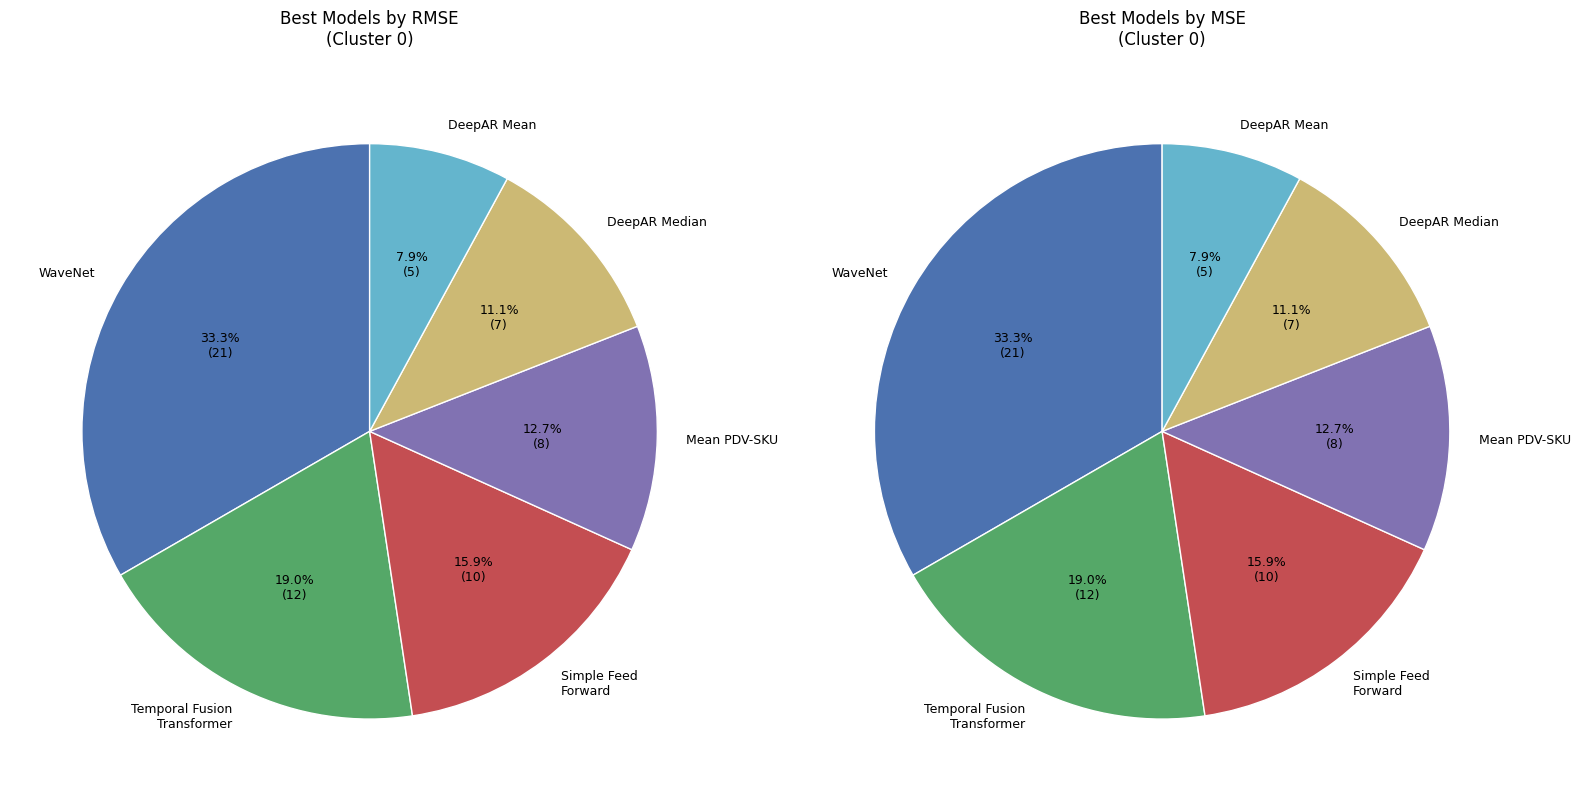


Cluster 0 - Best RMSE counts (original names):
best_rmse
rmse_cant_vta_pred_wavenet_mean     21
rmse_cant_vta_pred_tft_mean         12
rmse_cant_vta_pred_sff_mean         10
rmse_cant_vta_pred_mean_pdv_sku      8
rmse_cant_vta_pred_deepar_median     7
rmse_cant_vta_pred_deepar_mean       5

Cluster 0 - Best MSE counts (original names):
best_mse
mse_cant_vta_pred_wavenet_mean     21
mse_cant_vta_pred_tft_mean         12
mse_cant_vta_pred_sff_mean         10
mse_cant_vta_pred_mean_pdv_sku      8
mse_cant_vta_pred_deepar_median     7
mse_cant_vta_pred_deepar_mean       5


In [162]:
plot_best_model_pies(0)

# test

In [39]:
early = pd.read_csv('/Users/santiagoromano/Documents/code/MasterThesis/results/metrics_cluster_1_deepar_con_early.csv')
early = early[['pdv_codigo', 'codigo_barras_sku', 'rmse_cant_vta_pred_deepar_mean']]
early.rename(columns={'rmse_cant_vta_pred_deepar_mean': 'rmse_cant_vta_pred_deepar_mean_early'}, inplace=True)
early 

,pdv_codigo,codigo_barras_sku,rmse_cant_vta_pred_deepar_mean_early
0,1,7891149107797,111328.8
1,1,7891149200504,14463.9
2,2,7891149107797,107698.0
3,2,7891149200504,11938.7
4,3,7891149107797,58150.4
5,3,7891149200504,20986.5
6,4,7891149107797,43154.2
7,4,7891149200504,24741.3
8,5,7891149107797,67540.3
9,5,7891149200504,48378.3


In [40]:
sin_early = pd.read_csv('/Users/santiagoromano/Documents/code/MasterThesis/results/metrics_cluster_1_deepar_sin_early.csv')
sin_early = sin_early[['pdv_codigo', 'codigo_barras_sku', 'rmse_cant_vta_pred_deepar_mean']]
sin_early.rename(columns={'rmse_cant_vta_pred_deepar_mean': 'rmse_cant_vta_pred_deepar_mean_sin_early'}, inplace=True)
sin_early

,pdv_codigo,codigo_barras_sku,rmse_cant_vta_pred_deepar_mean_sin_early
0,1,7891149107797,101545.2
1,1,7891149200504,10587.0
2,2,7891149107797,86715.1
3,2,7891149200504,11619.0
4,3,7891149107797,50563.2
5,3,7891149200504,20378.7
6,4,7891149107797,37676.1
7,4,7891149200504,21573.2
8,5,7891149107797,59719.2
9,5,7891149200504,43079.3


In [41]:
def create_summary_dataframe(summary_df):

    rmse_columns = [col for col in summary_df.columns if col.startswith('rmse_')]
    summary_df['best_rmse'] = summary_df[rmse_columns].idxmin(axis=1)
    return summary_df

In [42]:
test_0 = early.merge(sin_early, on=['pdv_codigo', 'codigo_barras_sku'], how='inner')
test_0

,pdv_codigo,codigo_barras_sku,rmse_cant_vta_pred_deepar_mean_early,rmse_cant_vta_pred_deepar_mean_sin_early
0,1,7891149107797,111328.8,101545.2
1,1,7891149200504,14463.9,10587.0
2,2,7891149107797,107698.0,86715.1
3,2,7891149200504,11938.7,11619.0
4,3,7891149107797,58150.4,50563.2
5,3,7891149200504,20986.5,20378.7
6,4,7891149107797,43154.2,37676.1
7,4,7891149200504,24741.3,21573.2
8,5,7891149107797,67540.3,59719.2
9,5,7891149200504,48378.3,43079.3


In [43]:
summary = create_summary_dataframe(test_0)
summary['best_rmse'].value_counts()

best_rmse
rmse_cant_vta_pred_deepar_mean_sin_early    36
rmse_cant_vta_pred_deepar_mean_early         4
Name: count, dtype: int64

In [47]:
# 0,19 seg
mean_0 = pd.read_csv('/Users/santiagoromano/Documents/code/MasterThesis/results/metrics_cluster_0_mean.csv')
mean_0 = mean_0[['pdv_codigo', 'codigo_barras_sku',
       'rmse_cant_vta_pred_mean_pdv_sku']]
mean_0

,pdv_codigo,codigo_barras_sku,rmse_cant_vta_pred_mean_pdv_sku
0,1,78936478,1543.2
1,1,7892840800567,3781.6
2,1,7894900700015,8356.0
3,2,7894900700015,9126.6
4,3,7894900700015,7179.1
...,...,...,...
58,29,7892840800567,4609.7
59,29,7894900091007,1756.9
60,29,7894900700015,6966.9
61,30,7892840800567,10253.2


In [48]:
deepar_0 = pd.read_csv('/Users/santiagoromano/Documents/code/MasterThesis/results/metrics_cluster_0_deepar.csv')
print(deepar_0['codigo_barras_sku'].nunique(), deepar_0.shape, deepar_0[['codigo_barras_sku','pdv_codigo']].drop_duplicates().shape)
deepar_mean_0 = deepar_0[['pdv_codigo', 'codigo_barras_sku', 
       'rmse_cant_vta_pred_deepar_mean']]
deepar_mean_0

10 (63, 8) (63, 2)


,pdv_codigo,codigo_barras_sku,rmse_cant_vta_pred_deepar_mean
0,1,78936478,1601.7
1,1,7892840800567,3847.5
2,1,7894900700015,8356.7
3,2,7894900700015,9845.2
4,3,7894900700015,6817.4
...,...,...,...
58,29,7892840800567,4447.7
59,29,7894900091007,1675.9
60,29,7894900700015,7488.8
61,30,7892840800567,10666.9


In [79]:
tft_0 = pd.read_csv('/Users/santiagoromano/Documents/code/MasterThesis/results/metrics_cluster_0_tft.csv')
tft_0 = tft_0[['pdv_codigo', 'codigo_barras_sku', 
         'rmse_cant_vta_pred_tft_mean']]

In [80]:
test = tft_0.merge(mean_0, on=['pdv_codigo', 'codigo_barras_sku'], how='inner')
test

,pdv_codigo,codigo_barras_sku,rmse_cant_vta_pred_tft_mean,rmse_cant_vta_pred_mean_pdv_sku
0,1,78936478,1713.7,1543.2
1,1,7892840800567,4207.0,3781.6
2,1,7894900700015,8110.6,8356.0
3,2,7894900700015,8982.5,9126.6
4,3,7894900700015,6988.3,7179.1
...,...,...,...,...
58,29,7892840800567,4406.5,4609.7
59,29,7894900091007,1601.5,1756.9
60,29,7894900700015,7570.0,6966.9
61,30,7892840800567,10929.8,10253.2
